# Data Analytics Assignment 1

Imports

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Extracting data

In [4]:
# get pandas from csv

def read_csv(filename):
    return pd.read_csv(filename)

df = read_csv('../dataset.csv')
df

C:\Users\ARGHYA\AppData\Local\Temp\ipykernel_13260\2896704280.py:4: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filename)


,ID,Possession Status,Availability Starts From,Floor No,Commercial,Developer,Approved Authority Name,Units Available,Price,Price (English),...,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Possession By,NRI Pref,Land Area / Covered Area,Land Area Unit,Pantry Type
0,12685,Under Construction,Dec '25,5,N,NaN,KDMC,1.0,3150000.0,31.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
1,12684,Ready to Move,NaN,20,Y,TATA Housing Development Company Ltd.,TMC,10.0,6300000.0,63 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
2,12683,Ready to Move,NaN,18,N,Sai Satyam Developers,KDMC,0.0,5400000.0,54 Lac,...,1,1,1,1,1,NaN,Y,NaN,NaN,NaN
3,12682,Under Construction,Dec '25,5,N,Birla Estates,KDMC,70.0,9000000.0,90 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
4,12681,Under Construction,Dec '24,8,Y,Godrej Properties,NaN,NaN,4950000.0,49.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12680,5,Dec '26,Dec '26,NaN,Y,Kalpataru Ltd.,NaN,NaN,22200000.0,2.22 Cr,...,0,0,0,0,0,Dec '26,NaN,NaN,NaN,NaN
12681,4,Under Construction,Mar '26,10,N,Kalpataru Ltd.,MCGM,20.0,31000000.0,3.10 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
12682,3,Under Construction,Mar '26,5,N,Kalpataru Ltd.,MMRDA,7.0,18500000.0,1.85 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
12683,2,Ready to Move,NaN,1,Y,NaN,MCGM,0.0,22000000.0,2.20 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN


### Cleaning/Preprocessing

Homogenising Carpet Area

In [5]:

conversion_factors = {
    'Sq-ft': 1,
    'nan': np.nan,
    'Bigha': 27000, 
    'Hectare': 107639,
    'Acre': 43560,
    'Sq-m': 10.7639,
    'Sq-yrd': 9
}

df['Unit of Carpet Area']=df['Unit of Carpet Area'].fillna(df['Carpet Area Unit'])

df['Carpet Area'] = df.apply(lambda row: row['Carpet Area'] * conversion_factors.get(row['Unit of Carpet Area'], np.nan), axis=1)

df


,ID,Possession Status,Availability Starts From,Floor No,Commercial,Developer,Approved Authority Name,Units Available,Price,Price (English),...,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Possession By,NRI Pref,Land Area / Covered Area,Land Area Unit,Pantry Type
0,12685,Under Construction,Dec '25,5,N,NaN,KDMC,1.0,3150000.0,31.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
1,12684,Ready to Move,NaN,20,Y,TATA Housing Development Company Ltd.,TMC,10.0,6300000.0,63 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
2,12683,Ready to Move,NaN,18,N,Sai Satyam Developers,KDMC,0.0,5400000.0,54 Lac,...,1,1,1,1,1,NaN,Y,NaN,NaN,NaN
3,12682,Under Construction,Dec '25,5,N,Birla Estates,KDMC,70.0,9000000.0,90 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
4,12681,Under Construction,Dec '24,8,Y,Godrej Properties,NaN,NaN,4950000.0,49.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12680,5,Dec '26,Dec '26,NaN,Y,Kalpataru Ltd.,NaN,NaN,22200000.0,2.22 Cr,...,0,0,0,0,0,Dec '26,NaN,NaN,NaN,NaN
12681,4,Under Construction,Mar '26,10,N,Kalpataru Ltd.,MCGM,20.0,31000000.0,3.10 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
12682,3,Under Construction,Mar '26,5,N,Kalpataru Ltd.,MMRDA,7.0,18500000.0,1.85 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
12683,2,Ready to Move,NaN,1,Y,NaN,MCGM,0.0,22000000.0,2.20 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN


Handling missing values

In [6]:
# Replace NaN values with the median for each numeric column
numeric_df = df.select_dtypes(include='number')
medians = numeric_df.median()
df[numeric_df.columns] = df[numeric_df.columns].fillna(medians)

# for other columns, depends on task

# fill all nans of Carpet Area Unit and Unit of Carpet Area with 'Sq-ft'
df['Carpet Area Unit'] = df['Carpet Area Unit'].fillna('Sq-ft')
df['Unit of Carpet Area'] = df['Unit of Carpet Area'].fillna('Sq-ft')
df['covArea Unit'] = df['covArea Unit'].fillna('Sq-ft')

# df

In [7]:
# make three vectors, one for columns with no nan, one for columns with nan and numeric values, and one for columns with nan and non-numeric values

no_nan = []
nan_numeric = []
nan_non_numeric = []

for column in df.columns:
    if df[column].isnull().sum() == 0:
        no_nan.append(column)
    elif df[column].dtype == 'float64':
        nan_numeric.append(column)
    else:
        nan_non_numeric.append(column)

print(no_nan)
print(nan_numeric)
print(nan_non_numeric)

['ID', 'Commercial', 'Units Available', 'Price', 'Price (English)', 'Maintenance Charges', 'Booking Amount', 'Covered Area', 'sqft Price ', 'Carpet Area', 'Area Name', 'Unit of Carpet Area', 'Society', 'Bathroom', 'Transaction Type', 'Type of Property', 'City', 'bedroom', 'Data Referred From', 'floors', 'Luxury Flat', 'Carpet Area Unit', 'isPrimeLocationProperty', 'Tenants Preference', 'covArea Unit', 'isLuxuryServiceProvided', 'balconies', 'Power Back Up', 'Lift', 'Rain Water Harvesting', 'Club House', 'Swimming Pool', 'Gymnasium', 'Park', 'Parking', 'Security', 'Water Storage', 'Private Terrace/Garden', 'Vaastu Compliant', 'Service/Goods Lift', 'Air Conditioned', 'Visitor Parking', 'Intercom Facility', 'Maintenance Staff', 'Waste Disposal', 'Laundry Service', 'Internet/Wi-Fi Connectivity', 'DTH Television Facility', 'RO Water System', 'Banquet Hall', 'Bar/Lounge', 'Cafeteria/Food Court', 'Conference Room', 'Piped Gas', 'Jogging and Strolling Track', 'Outdoor Tennis Courts', 'Mansion'

In [8]:
# for columns with nan and non numeric values except Developer, Project Name, Landmark, fill with mode
for column in nan_non_numeric:
    if column not in ['Developer', 'Project Name', 'Landmark']:
        df[column] = df[column].fillna(df[column].mode()[0])

# find number of columns with nan values
nan_columns = df.columns[df.isnull().any()]
len(nan_columns)

3

none of the binary columns have nan values. hence not taking care of those separately

### Task 1

As investors have diverse budget limits, split the overall opportunities into three different price ranges. Analyze the distribution of these price ranges across cities.

In [9]:
# divide into three price ranges

# Calculate percentiles
low_threshold = df['Price'].quantile(0.33)
medium_threshold = df['Price'].quantile(0.66)

# Define price ranges using percentiles
bins = [0, low_threshold, medium_threshold, df['Price'].max()]
labels = ['Low', 'Medium', 'High']

price_range = pd.cut(df['Price'], bins=bins, labels=labels, include_lowest=True)
# price_range

grouped_data=df.groupby(['City',price_range]).size().unstack()
grouped_data

Price,Low,Medium,High
City,,,
Agartala,1,0,0
Bhiwandi,2,0,0
Gurgaon,1,0,0
Hyderabad,8,0,0
Kalyan,7,2,0
Mumbai,2064,2598,3880
Nagpur,5,2,0
Palghar,2,0,0
Thane,2114,1570,429


Stacked Bar Graph

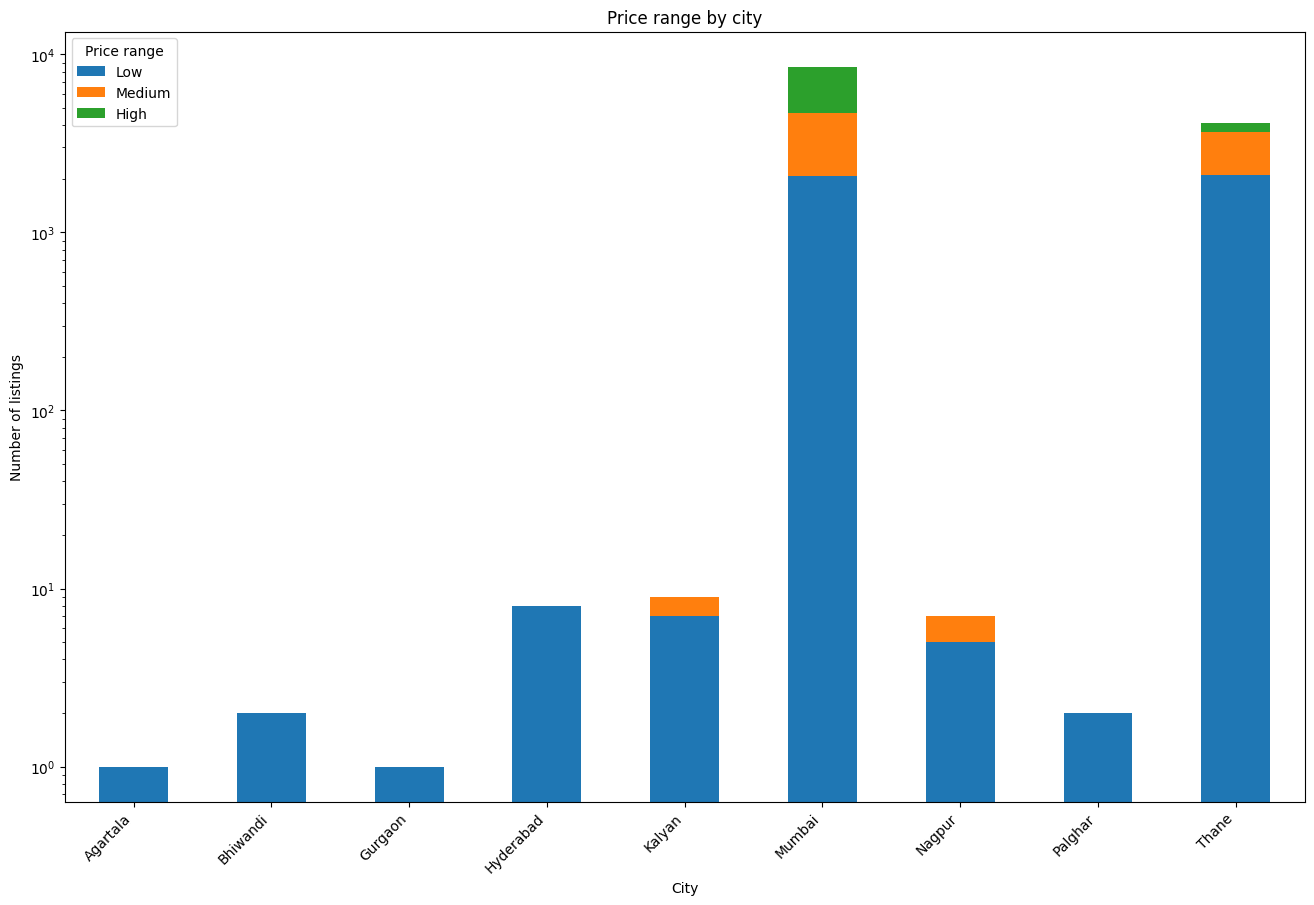

In [10]:
grouped_data.plot(kind='bar', stacked=True, figsize=(16, 10))
plt.title('Price range by city')
# taking log scale to make the graph more readable
plt.yscale('log')
plt.xlabel('City')
plt.ylabel('Number of listings')
plt.legend(title='Price range')
plt.xticks(rotation=45, ha='right')
plt.show()


Box Plot

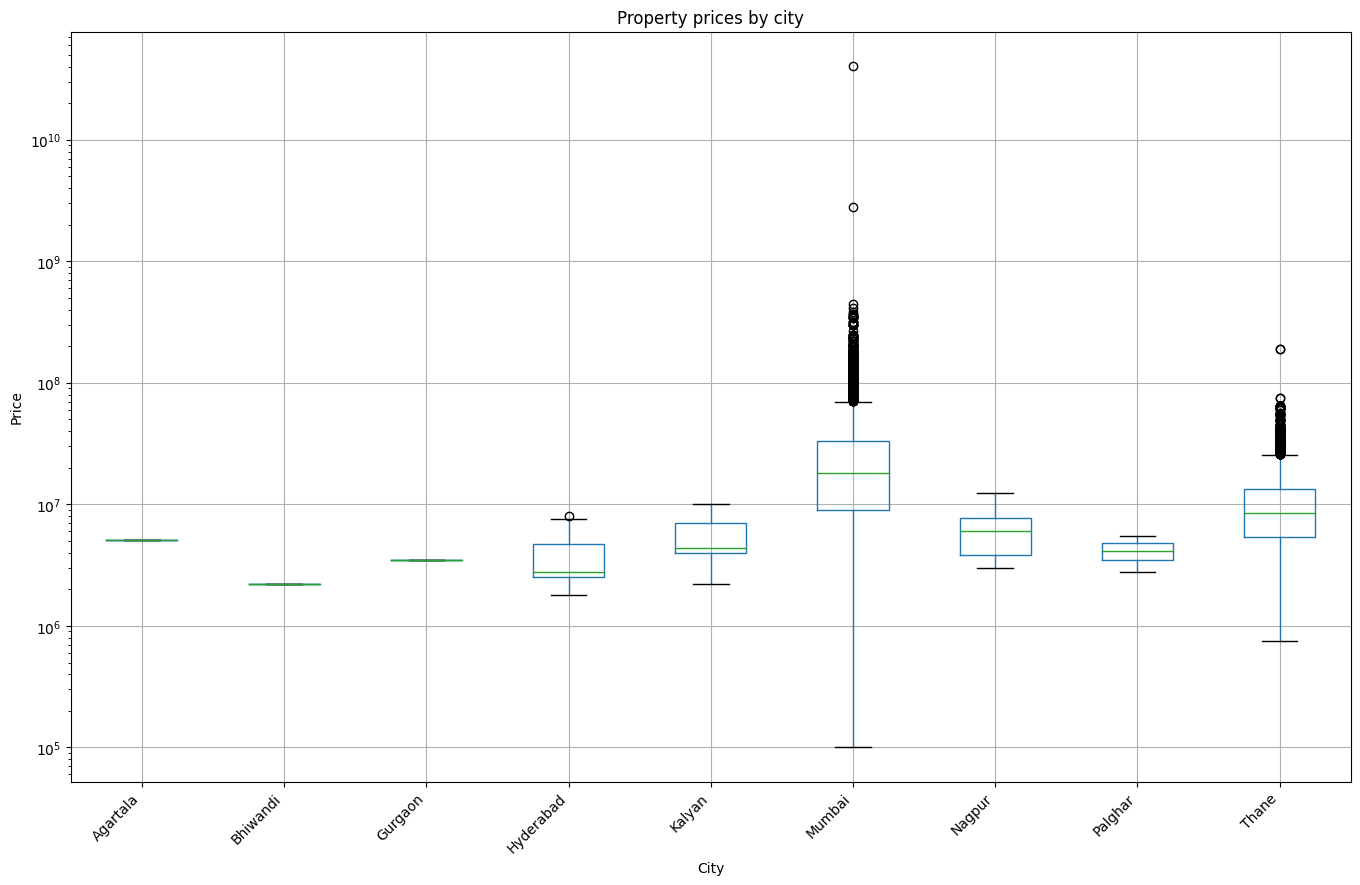

In [11]:
df.boxplot(column='Price', by='City', figsize=(16, 10))
plt.title('Property prices by city')
plt.suptitle('')
plt.xlabel('City')
plt.ylabel('Price')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\ARGHYA\AppData\Local\Temp\ipykernel_13260\3689687052.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='City', y='Price', data=df, scale='width', inner='quartile')


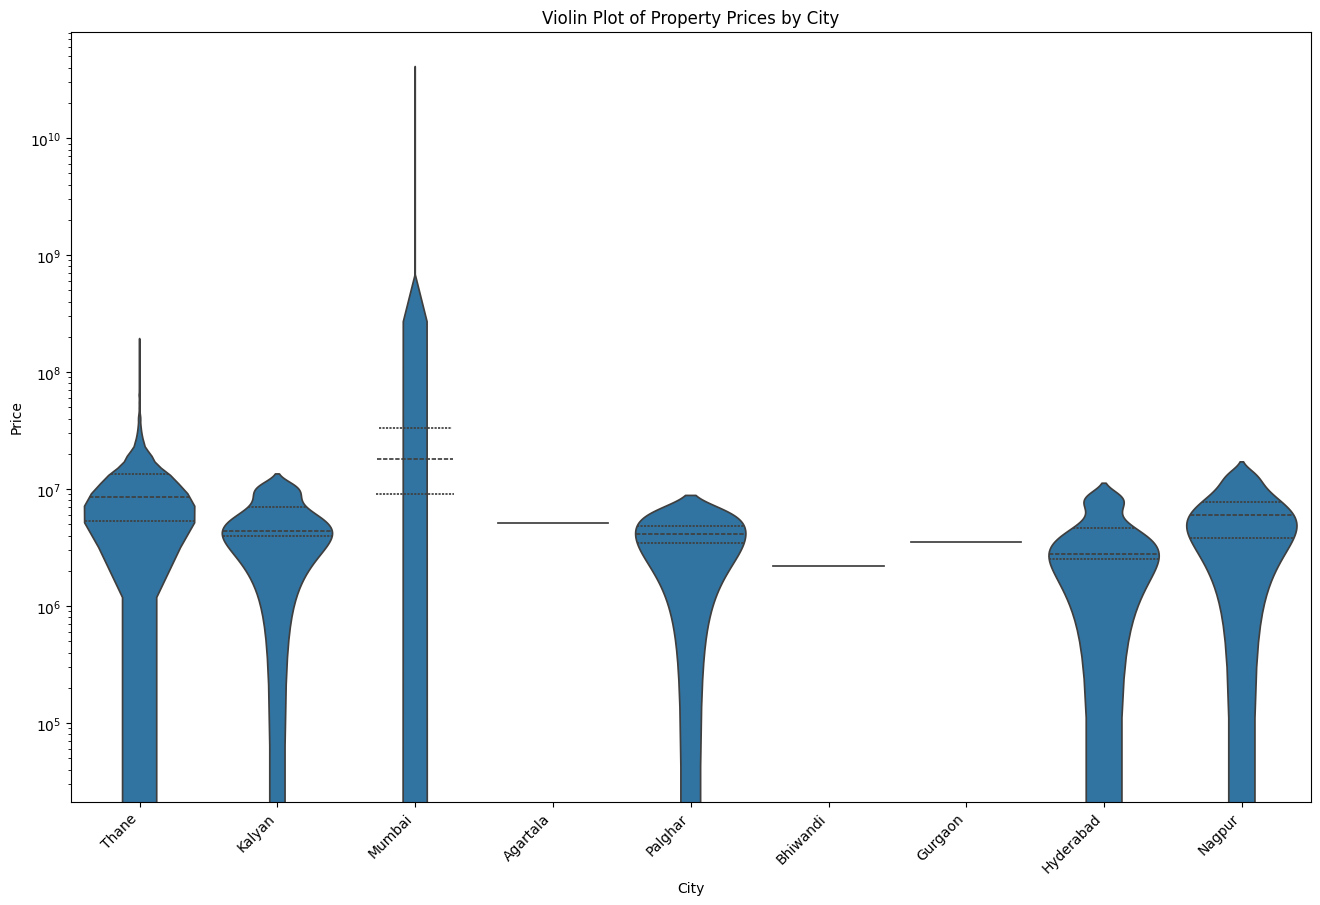

In [12]:
plt.figure(figsize=(16, 10))
sns.violinplot(x='City', y='Price', data=df, scale='width', inner='quartile')
plt.title('Violin Plot of Property Prices by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Log scale if needed
plt.show()


### Task 2

Provide investors with a high-level summary of the whole data using the price range dimensions. Consider factors like Type of Property, city, and key amenities. What method/tool would you use to present this information effectively?

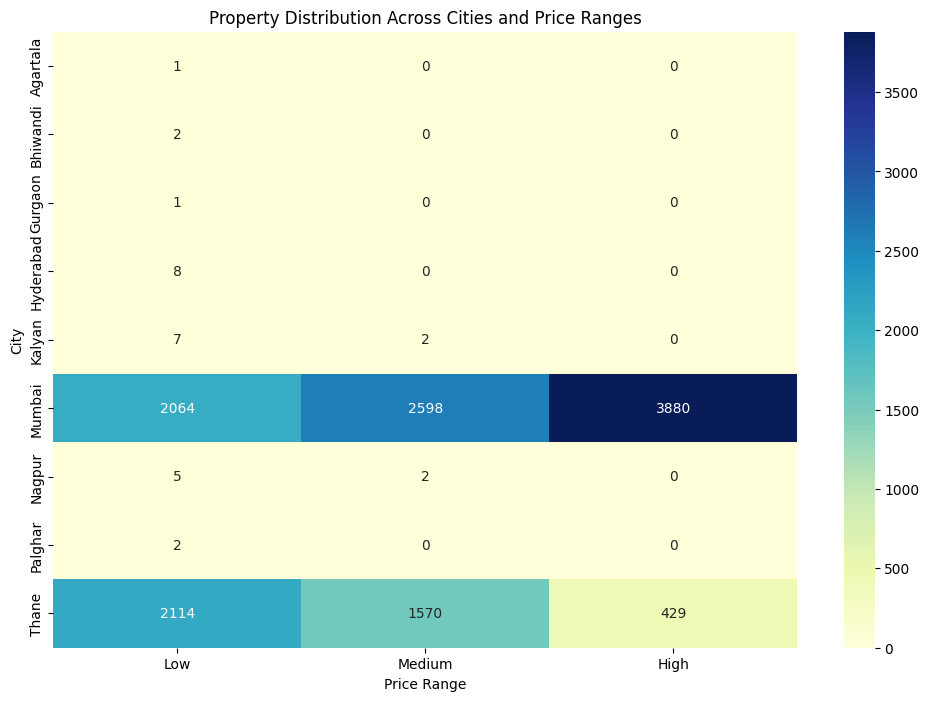

In [13]:
# Create a pivot table to aggregate the count of properties by city and price range
price_range_city = pd.crosstab(df['City'],price_range)

plt.figure(figsize=(12, 8))
sns.heatmap(price_range_city, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Property Distribution Across Cities and Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('City')
plt.show()

In [14]:
# add a new column to the dataframe with the price range

df['Price Range'] = price_range
df['Amenities Facing']

C:\Users\ARGHYA\AppData\Local\Temp\ipykernel_13260\3532553148.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Price Range'] = price_range


0                   Garden/Park, Pool
1                           Main Road
2              Garden/Park, Main Road
3        Pool, Garden/Park, Main Road
4                         Garden/Park
                     ...             
12680                       Main Road
12681    Garden/Park, Pool, Main Road
12682                     Garden/Park
12683                       Main Road
12684                       Main Road
Name: Amenities Facing, Length: 12685, dtype: object

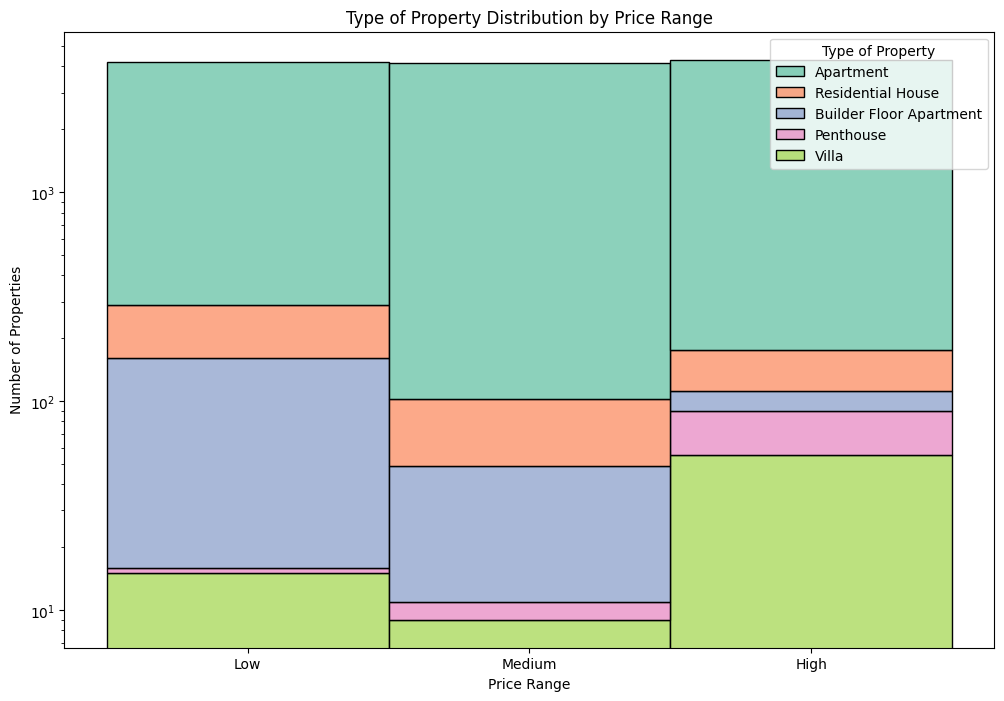

In [15]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Price Range', hue='Type of Property', multiple='stack', palette='Set2')
plt.title('Type of Property Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Properties')
plt.yscale('log')
plt.show()

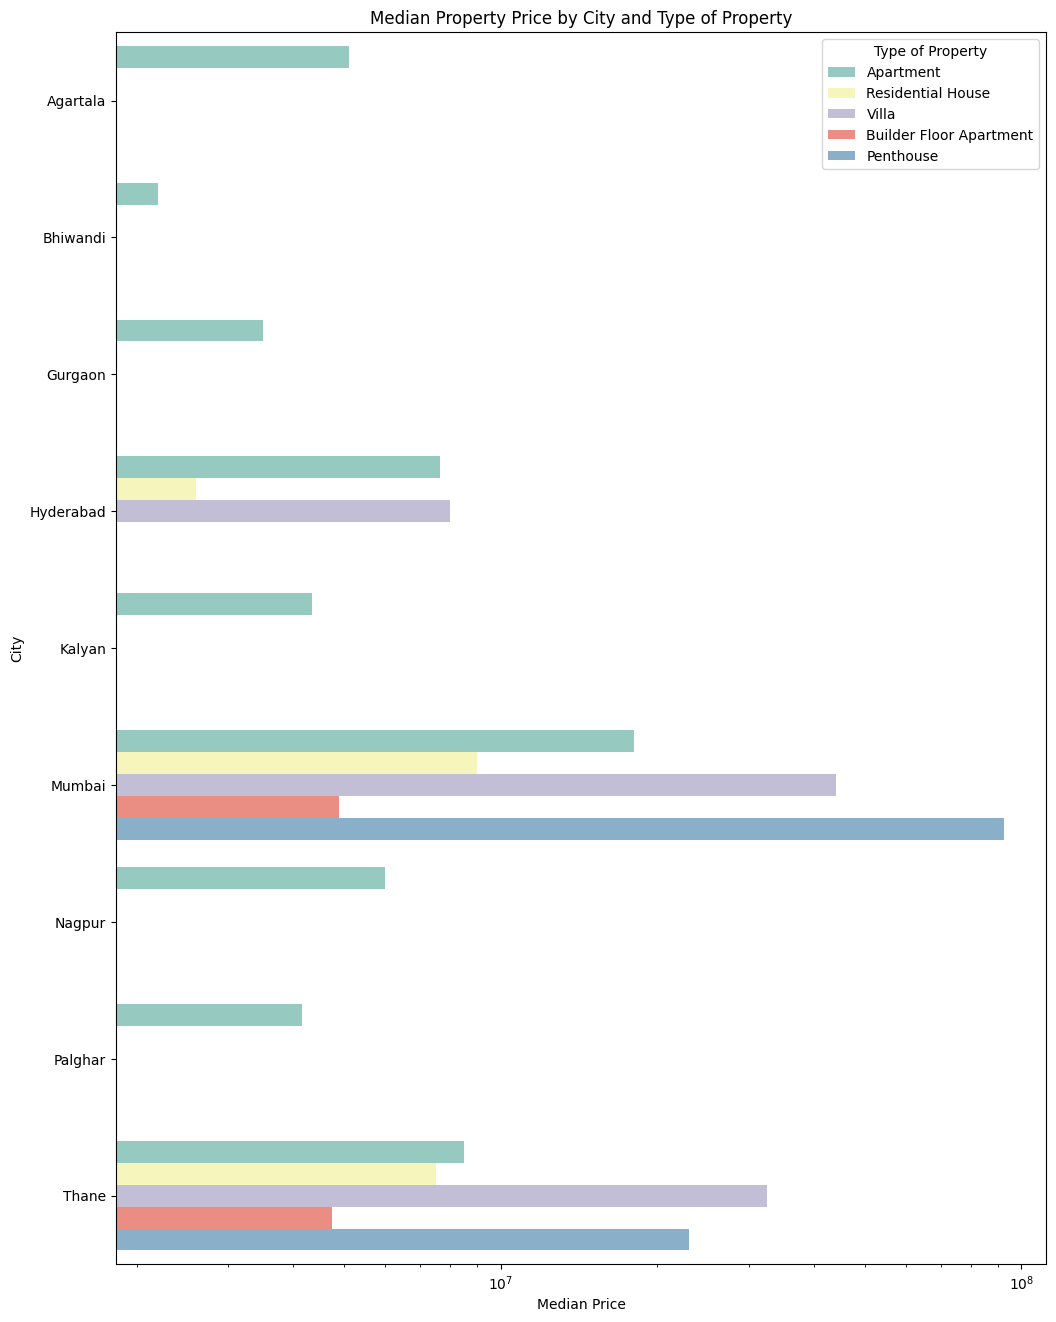

In [16]:
# Calculate median prices
median_price_by_city_type = df.groupby(['City', 'Type of Property'])['Price'].median().reset_index()

plt.figure(figsize=(12, 16))
sns.barplot(x='Price', y='City', hue='Type of Property', data=median_price_by_city_type, palette='Set3')
plt.title('Median Property Price by City and Type of Property')
plt.xlabel('Median Price')
plt.ylabel('City')
plt.xscale('log')  # Log scale for a better view of price ranges
plt.show()

In [17]:

from tabulate import tabulate

# Summary statistics for the expanded summary table
summary_stats = {
    'Metric': [
        'Average Price',
        'Median Price',
        'Price Range Spread',
        'Standard Deviation of Prices',
        'City with Highest Median Price',
        'City with Lowest Median Price',
        'City with Most Listings',
        'Most Common Type of Property',
        'Type of Property with Highest Average Price',
        'Type of Property with Lowest Average Price',
        'Percentage of Properties with Gymnasium',
        'Percentage of Properties with Swimming Pool',
        'Properties with Both Gymnasium and Swimming Pool',
        'Top 3 Cities for Affordable Investments',
        'Top 3 Cities for Luxury Investments',
        'Cities with the Most Diverse Price Ranges',
        # 'Number of New Listings (Last Month)',
        # 'Fastest Selling City'
    ],
    'Value': [
        df['Price'].mean(),
        df['Price'].median(),
        df['Price'].max() - df['Price'].min(),
        df['Price'].std(),
        df.groupby('City')['Price'].median().idxmax(),
        df.groupby('City')['Price'].median().idxmin(),
        df['City'].value_counts().idxmax(),
        df['Type of Property'].mode()[0],
        df.groupby('Type of Property')['Price'].mean().idxmax(),
        df.groupby('Type of Property')['Price'].mean().idxmin(),
        f"{df['Gymnasium'].mean() * 100:.2f}%",
        f"{df['Swimming Pool'].mean() * 100:.2f}%",
        ((df['Gymnasium'] == 1) & (df['Swimming Pool'] == 1)).sum(),
        ', '.join(df[df['Price Range'] == 'Low']['City'].value_counts().nlargest(3).index),
        ', '.join(df[df['Price Range'] == 'High']['City'].value_counts().nlargest(3).index),
        ', '.join(df.groupby('City')['Price Range'].nunique().nlargest(3).index),
    ]
}

# Create the table
table = tabulate(summary_stats, headers='keys', tablefmt='fancy_grid')

# Print the table
print(table)


╒══════════════════════════════════════════════════╤══════════════════════════╕
│ Metric                                           │ Value                    │
╞══════════════════════════════════════════════════╪══════════════════════════╡
│ Average Price                                    │ 26317173.44824596        │
├──────────────────────────────────────────────────┼──────────────────────────┤
│ Median Price                                     │ 13500000.0               │
├──────────────────────────────────────────────────┼──────────────────────────┤
│ Price Range Spread                               │ 40799900001.0            │
├──────────────────────────────────────────────────┼──────────────────────────┤
│ Standard Deviation of Prices                     │ 364154507.66538703       │
├──────────────────────────────────────────────────┼──────────────────────────┤
│ City with Highest Median Price                   │ Mumbai                   │
├───────────────────────────────────────

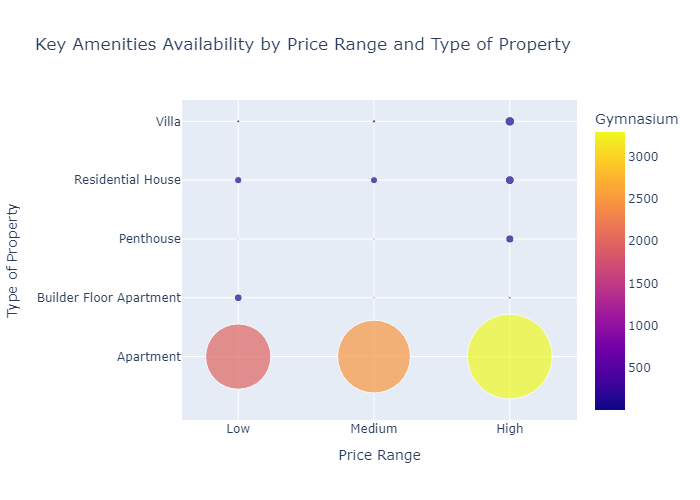

In [18]:

import plotly.express as px

# Assuming amenities columns are binary (0 or 1), sum the values for each price range and Type of Property
amenities_data = df.groupby(['Price Range', 'Type of Property']).sum().reset_index()

fig = px.scatter(amenities_data, x='Price Range', y='Type of Property',
                 size='Swimming Pool', color='Gymnasium', hover_name='Type of Property',
                 size_max=60, title='Key Amenities Availability by Price Range and Type of Property')
fig.show(renderer='png')


### Task 3

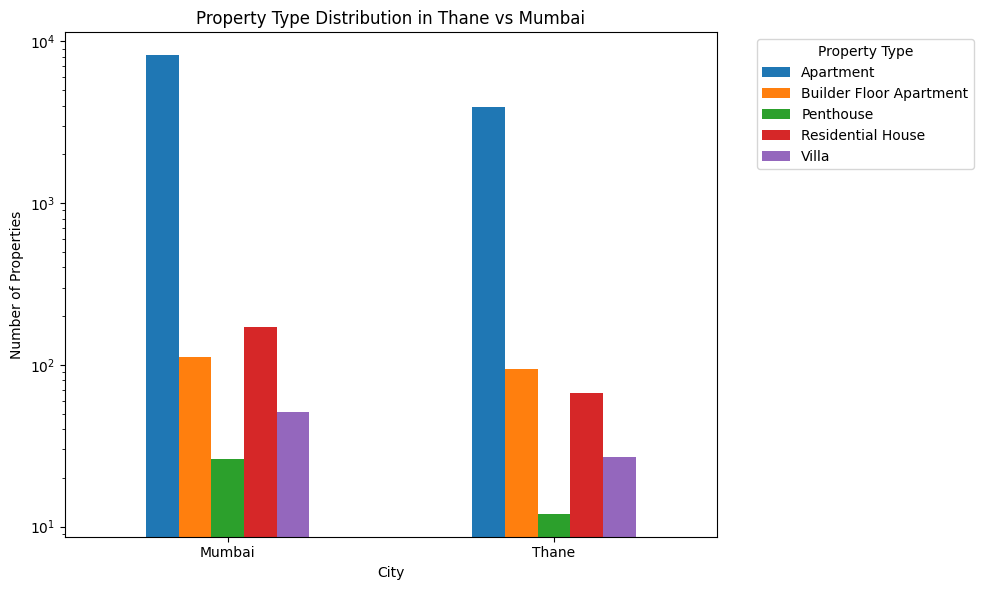

In [19]:
# Filter data for Thane and Mumbai
thane_mumbai_data = df[df['City'].isin(['Thane', 'Mumbai'])]

# 1. Property Type Distribution
property_type_dist = thane_mumbai_data.groupby(['City', 'Type of Property']).size().unstack()

# Plotting Property Type Distribution as a Grouped Bar Graph
property_type_dist.plot(kind='bar', stacked=False, figsize=(10, 6))  # Set stacked=False for grouped bar graph
plt.title('Property Type Distribution in Thane vs Mumbai')
plt.ylabel('Number of Properties')
plt.yscale('log')  # Log scale for better visualization
plt.xlabel('City')
plt.grid(False)
plt.xticks(rotation=0)
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


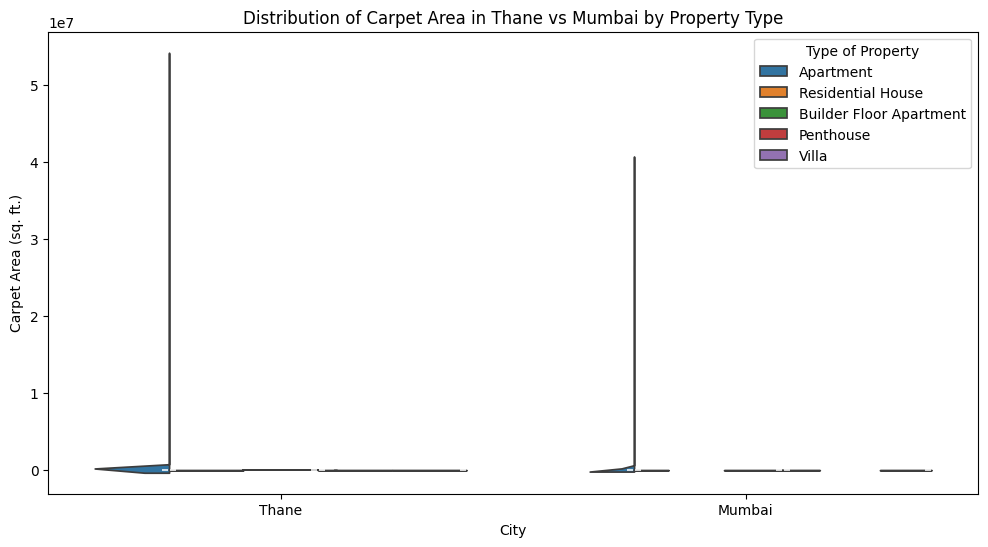

In [20]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='City', y='Carpet Area', hue='Type of Property', data=thane_mumbai_data, split=True)
plt.title('Distribution of Carpet Area in Thane vs Mumbai by Property Type')
plt.ylabel('Carpet Area (sq. ft.)')
# plt.yscale('log')
plt.xlabel('City')
plt.show()

C:\Users\ARGHYA\AppData\Local\Temp\ipykernel_13260\1227943747.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



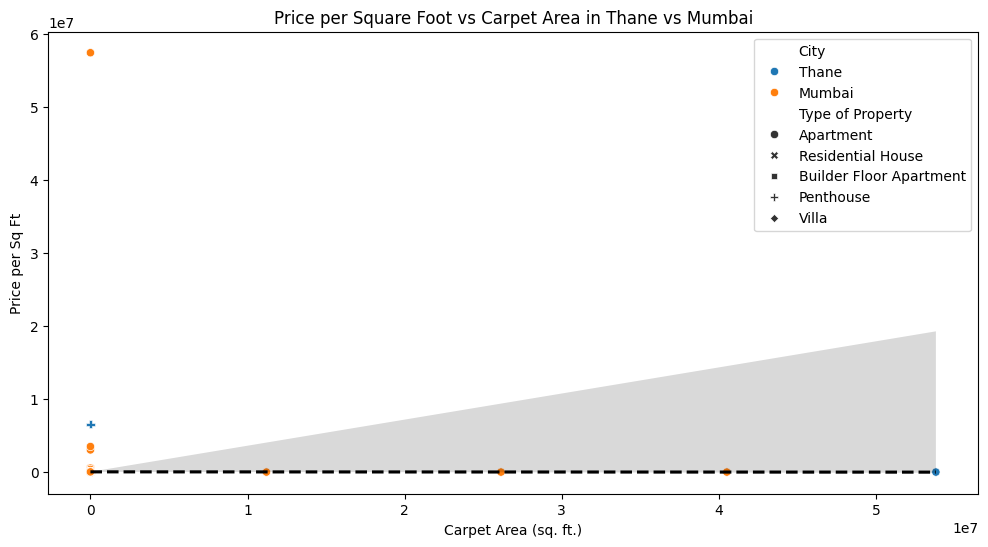

In [21]:
# 4. Price per Square Foot Analysis: Scatter Plot with Regression Line
thane_mumbai_data['Price per Sq Ft'] = thane_mumbai_data['Price'] / thane_mumbai_data['Carpet Area']

# # filter to less than 1e7
# thane_mumbai_data = thane_mumbai_data[thane_mumbai_data['Price per Sq Ft'] < 1e7]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Carpet Area', y='Price per Sq Ft', hue='City', style='Type of Property', data=thane_mumbai_data)
sns.regplot(x='Carpet Area', y='Price per Sq Ft', data=thane_mumbai_data, scatter=False, color='black', line_kws={"linestyle":"--"})
plt.title('Price per Square Foot vs Carpet Area in Thane vs Mumbai')
plt.ylabel('Price per Sq Ft')
plt.xlabel('Carpet Area (sq. ft.)')
plt.show()

C:\Users\ARGHYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



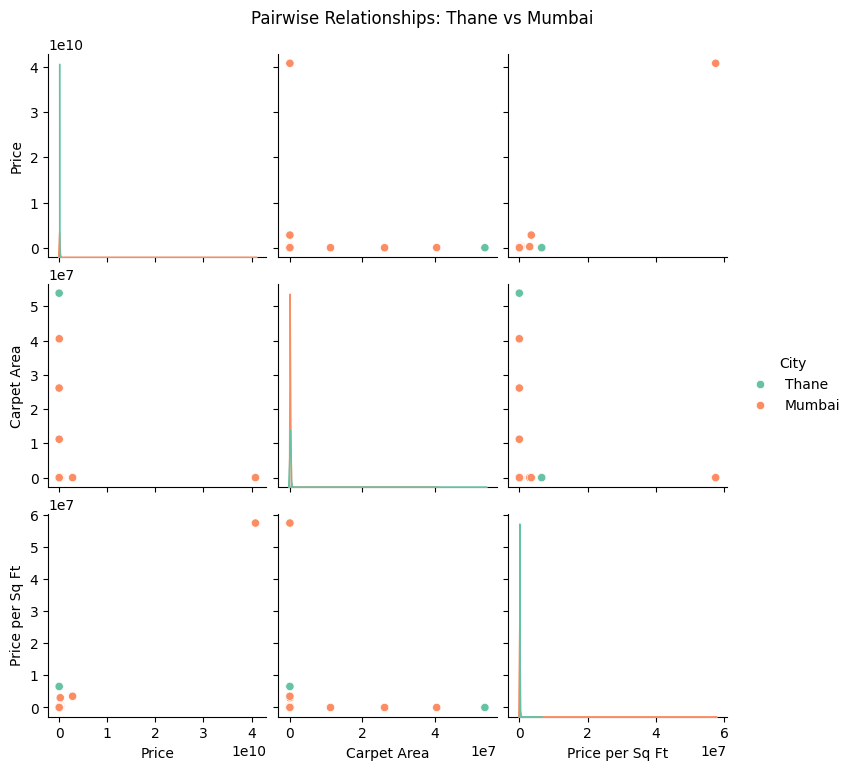

In [22]:
# 5. Correlation Analysis: Pair Plot
pairplot_data = thane_mumbai_data[['Price', 'Carpet Area', 'Price per Sq Ft', 'City']]
sns.pairplot(pairplot_data, hue='City', palette='Set2')
plt.suptitle('Pairwise Relationships: Thane vs Mumbai', y=1.02)
plt.show()

### Task 4

(within each city???)

In [23]:
df['City'].value_counts()

Mumbai       8542
Thane        4113
Kalyan          9
Hyderabad       8
Nagpur          7
Palghar         2
Bhiwandi        2
Agartala        1
Gurgaon         1
Name: City, dtype: int64

In [24]:

# Step 1: Filter data for high-budget properties
high_budget_threshold = df['Price'].quantile(0.75)  # Consider top 25% as high-budget properties
high_budget_data = df[df['Price'] >= high_budget_threshold]

low_budget_threshold = df['Price'].quantile(0.25)  # Consider bottom 25% as low-budget properties
low_budget_data = df[df['Price'] <= low_budget_threshold]

<Figure size 1200x600 with 0 Axes>

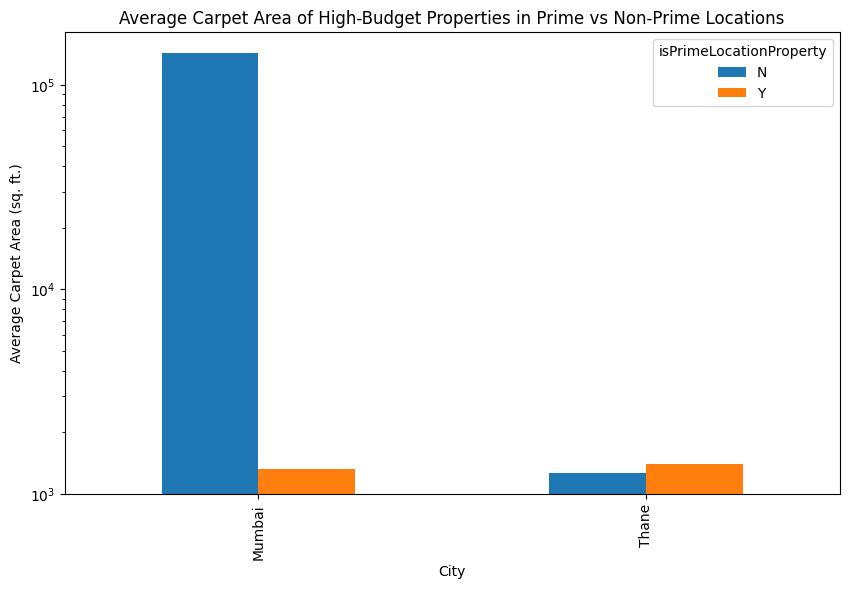

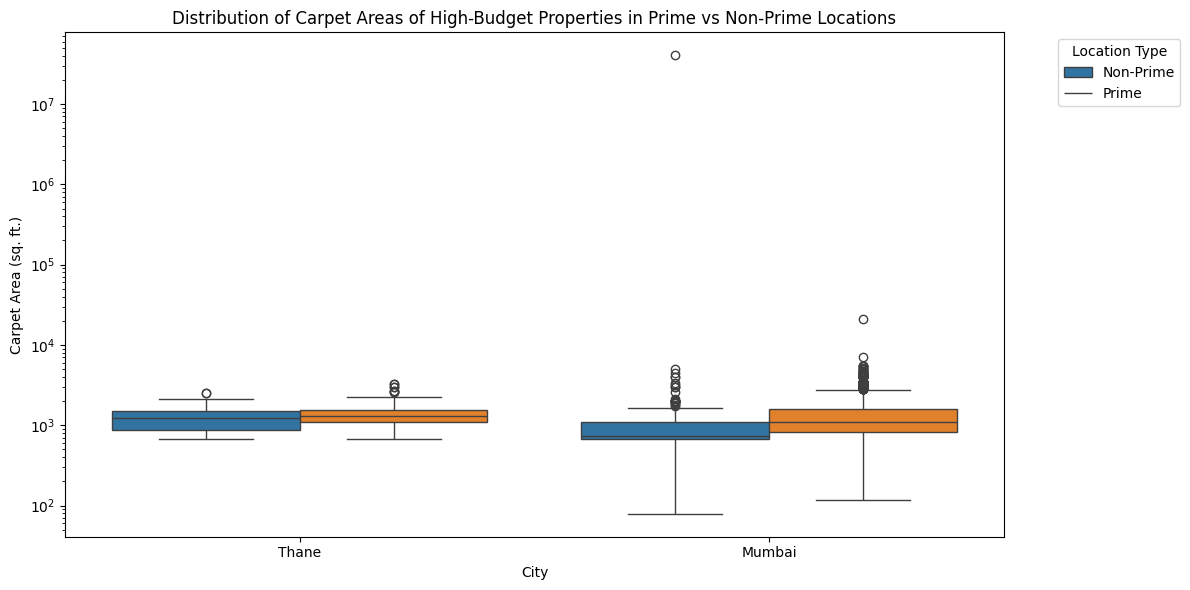

In [25]:
# Step 2: Group data by Prime vs Non-Prime Locations
prime_vs_non_prime = high_budget_data.groupby(['City', 'isPrimeLocationProperty'])['Carpet Area'].mean().unstack()

# Step 3: Visualization
plt.figure(figsize=(12, 6))

# Bar Plot
prime_vs_non_prime.plot(kind='bar', figsize=(10, 6))
plt.title('Average Carpet Area of High-Budget Properties in Prime vs Non-Prime Locations')
plt.ylabel('Average Carpet Area (sq. ft.)')
plt.xlabel('City')
plt.yscale('log')
plt.show()

# Box Plot: Distribution of Carpet Areas in Prime vs Non-Prime Locations
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Carpet Area', hue='isPrimeLocationProperty', data=high_budget_data)
plt.title('Distribution of Carpet Areas of High-Budget Properties in Prime vs Non-Prime Locations')
plt.ylabel('Carpet Area (sq. ft.)')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.yscale('log')
plt.legend(title='Location Type', labels=['Non-Prime', 'Prime'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

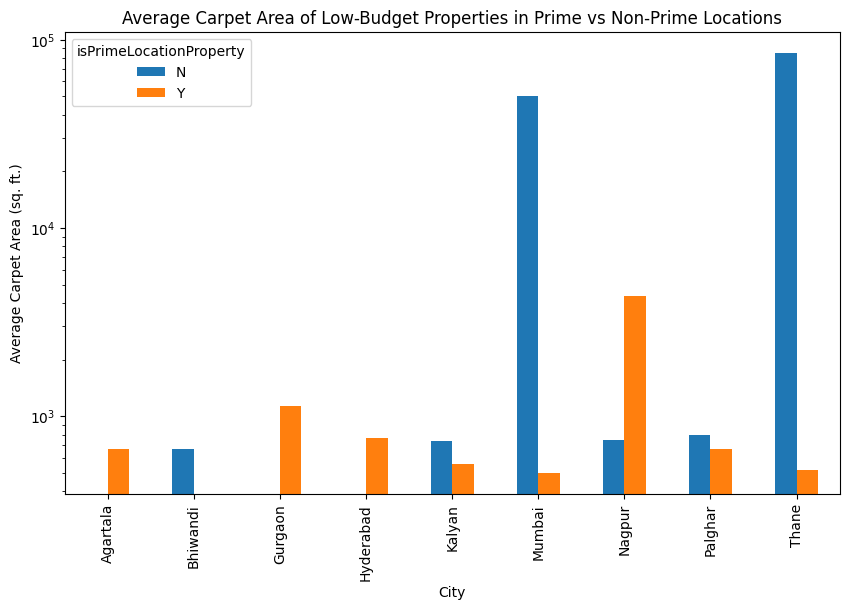

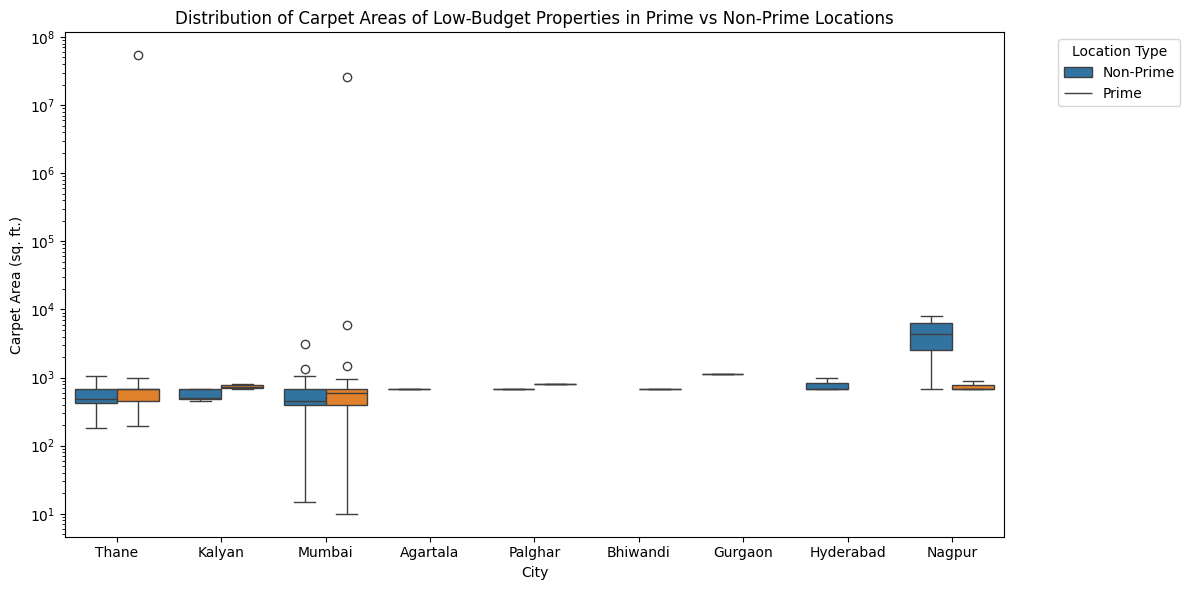

In [26]:
# Step 2: Group data by Prime vs Non-Prime Locations
prime_vs_non_prime = low_budget_data.groupby(['City', 'isPrimeLocationProperty'])['Carpet Area'].mean().unstack()

# Step 3: Visualization
plt.figure(figsize=(12, 6))

# Bar Plot
prime_vs_non_prime.plot(kind='bar', figsize=(10, 6))
plt.title('Average Carpet Area of Low-Budget Properties in Prime vs Non-Prime Locations')
plt.ylabel('Average Carpet Area (sq. ft.)')
plt.xlabel('City')
plt.yscale('log')
plt.show()

# Box Plot: Distribution of Carpet Areas in Prime vs Non-Prime Locations
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Carpet Area', hue='isPrimeLocationProperty', data=low_budget_data)
plt.title('Distribution of Carpet Areas of Low-Budget Properties in Prime vs Non-Prime Locations')
plt.ylabel('Carpet Area (sq. ft.)')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.yscale('log')
plt.legend(title='Location Type', labels=['Non-Prime', 'Prime'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Task 5

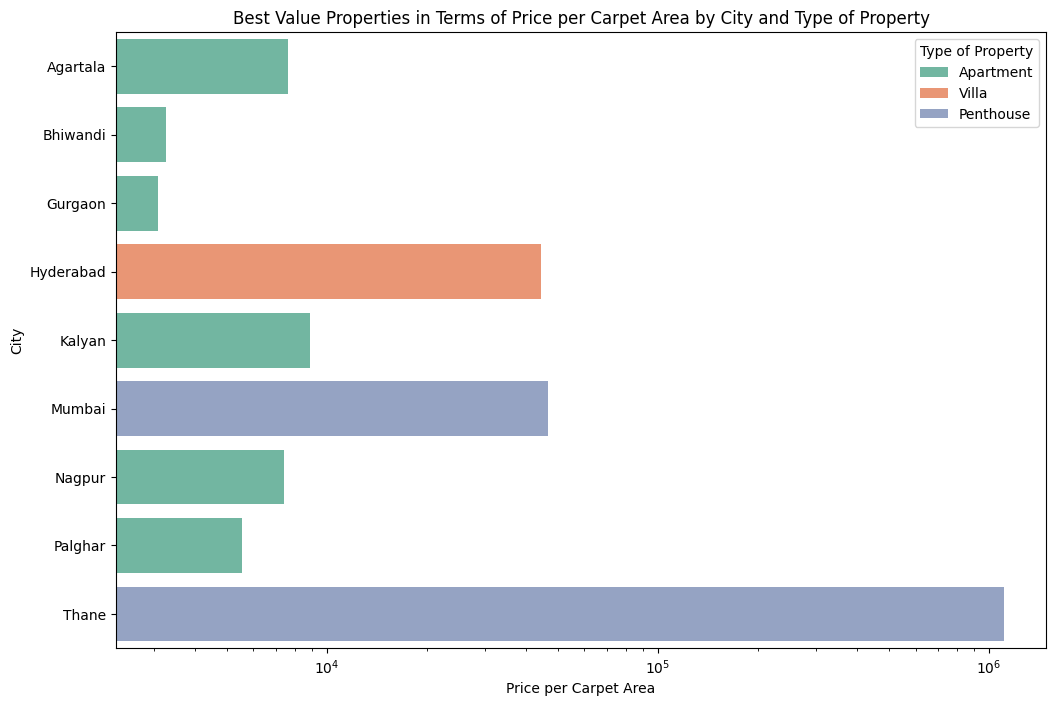

In [27]:
# Identify and visualize properties that offer the best value in terms of Carpet Area per unit of Price across different cities

# make a copy of the dataframe
df_copy = df.copy()

# drop all rows with NA carpet area
df_copy.dropna(subset=['Carpet Area'], inplace=True)

# Calculate Carpet Area per unit of Price
df_copy['Price per Carpet Area'] = df_copy['Price'] / df_copy['Carpet Area'] 

# Group data by City and Type of Property
city_property_group = df_copy.groupby(['City', 'Type of Property'])['Price per Carpet Area'].mean().reset_index()

# Find the property with the best value in terms of Carpet Area per unit of Price for each City
best_value_properties = city_property_group.loc[city_property_group.groupby('City')['Price per Carpet Area'].idxmax()]

# Plotting the best value properties
plt.figure(figsize=(12, 8))
sns.barplot(x='Price per Carpet Area', y='City', hue='Type of Property', data=best_value_properties, palette='Set2')
plt.title('Best Value Properties in Terms of Price per Carpet Area by City and Type of Property')
plt.xlabel('Price per Carpet Area')
plt.xscale('log')
plt.ylabel('City')
plt.show()

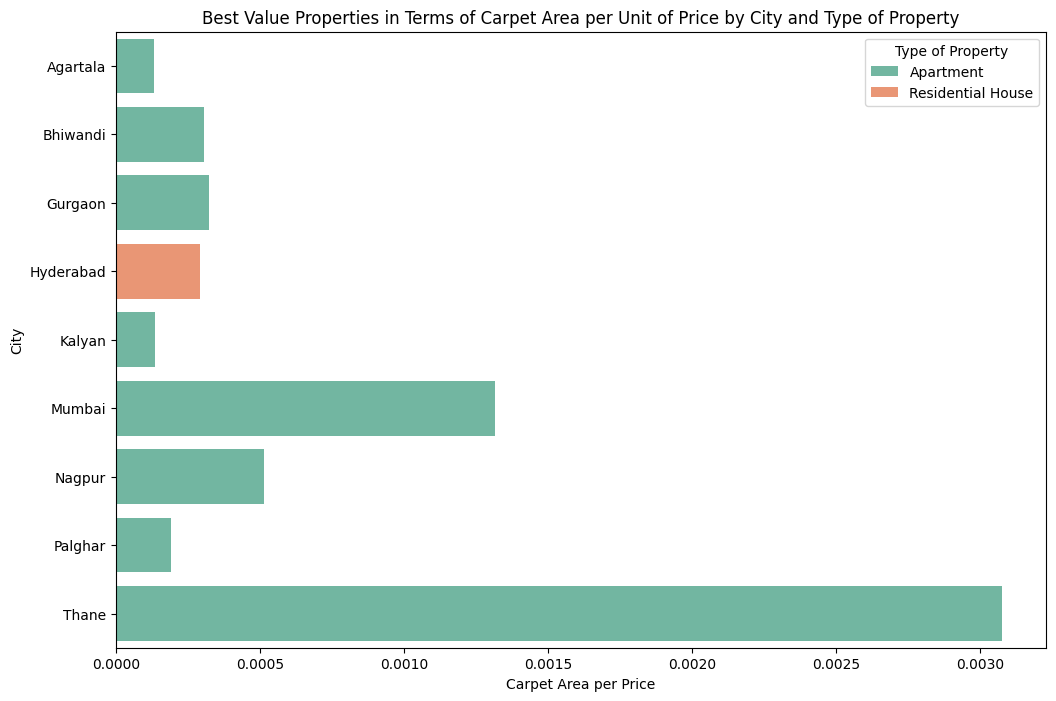

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy of the DataFrame
df_copy = df.copy()

# Drop rows with NA Carpet Area
df_copy.dropna(subset=['Carpet Area'], inplace=True)

# Calculate Carpet Area per unit of Price
df_copy['Carpet Area per Price'] = df_copy['Carpet Area'] / df_copy['Price']

# Group data by City and Type of Property, and calculate the mean Carpet Area per Price
city_property_group = df_copy.groupby(['City', 'Type of Property'])['Carpet Area per Price'].mean().reset_index()

# Find the property with the highest value (best Carpet Area per Price) for each City
best_value_properties = city_property_group.loc[city_property_group.groupby('City')['Carpet Area per Price'].idxmax()]

# Plotting the best value properties
plt.figure(figsize=(12, 8))
sns.barplot(x='Carpet Area per Price', y='City', hue='Type of Property', data=best_value_properties, palette='Set2')
plt.title('Best Value Properties in Terms of Carpet Area per Unit of Price by City and Type of Property')
plt.xlabel('Carpet Area per Price')
plt.ylabel('City')
plt.show()


In [29]:
# # carpet area vs price across different cities except mumbai

# # Filter data for cities excluding Mumbai
# # df_other_cities = df[df['City'] != 'Mumbai']
# df_other_cities = df[~df['City'].isin(['Mumbai', 'Thane'])]


# # Scatter Plot: Carpet Area vs Price Across Different Cities

# plt.figure(figsize=(12, 6))
# sns.scatterplot(x='Carpet Area', y='Price', hue='City', style='City', data=df_other_cities)
# # sns.scatterplot(x='Carpet Area', y='Price', hue='City', style='City', data=df)
# plt.title('Carpet Area vs Price Across Different Cities (Excluding Mumbai)')
# plt.ylabel('Price')
# plt.xlabel('Carpet Area (sq. ft.)')
# plt.show()

In [30]:
# # now one just for mumbai and thane

# # Filter data for Mumbai and Thane
# thane_mumbai_data = df[df['City'].isin(['Mumbai', 'Thane'])]

# # put y axis limit of 1e10
# plt.figure(figsize=(12, 6))
# sns.scatterplot(x='Carpet Area', y='Price', hue='City', style='City', data=thane_mumbai_data)
# plt.title('Carpet Area vs Price for Mumbai and Thane')
# plt.ylabel('Price')
# plt.xlabel('Carpet Area (sq. ft.)')
# plt.yscale('log')
# plt.show()


### Task 6

In [31]:
# Filter data for commercial properties in Mumbai and Thane
# commercial_data = df[(df['City'].isin(['Mumbai', 'Thane'])) & (df['Type of Property'] == 'Builder Floor Apartment')]
commercial_data = df[(df['City'].isin(['Mumbai', 'Thane'])) & (df['Commercial'] == 'Y')]
commercial_data


,ID,Possession Status,Availability Starts From,Floor No,Commercial,Developer,Approved Authority Name,Units Available,Price,Price (English),...,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Possession By,NRI Pref,Land Area / Covered Area,Land Area Unit,Pantry Type,Price Range
1,12684,Ready to Move,Dec '25,20,Y,TATA Housing Development Company Ltd.,TMC,10.0,6300000.0,63 Lac,...,1,1,1,1,Dec '26,Y,2000.0,12850.0,Personal Pantry/Cafeteria,Low
4,12681,Under Construction,Dec '24,8,Y,Godrej Properties,MCGM,1.0,4950000.0,49.5 Lac,...,1,1,1,1,Dec '26,Y,2000.0,12850.0,Personal Pantry/Cafeteria,Low
12,12673,Ready to Move,Dec '25,9,Y,Tharwani Infrastructures,MCGM,1.0,4900000.0,49 Lac,...,1,1,1,1,Dec '26,Y,2000.0,12850.0,Personal Pantry/Cafeteria,Low
28,12657,Under Construction,Dec '25,3,Y,NaN,KDMC,12.0,4300000.0,43 Lac,...,1,1,1,1,Dec '26,Y,2000.0,12850.0,Personal Pantry/Cafeteria,Low
37,12648,Ready to Move,Dec '25,9,Y,Tharwani Infrastructures,MCGM,1.0,4900000.0,49 Lac,...,1,1,1,1,Dec '26,Y,2000.0,12850.0,Personal Pantry/Cafeteria,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12678,7,Ready to Move,Dec '25,3,Y,Atul Projects,MCGM,1.0,20922633.0,2.09 Cr,...,0,0,0,0,Dec '26,Y,2000.0,12850.0,Personal Pantry/Cafeteria,High
12679,6,Ready to Move,Dec '25,3,Y,Atul Projects,MCGM,1.0,18709662.0,1.87 Cr,...,0,0,0,0,Dec '26,Y,2000.0,12850.0,Personal Pantry/Cafeteria,Medium
12680,5,Dec '26,Dec '26,3,Y,Kalpataru Ltd.,MCGM,1.0,22200000.0,2.22 Cr,...,0,0,0,0,Dec '26,Y,2000.0,12850.0,Personal Pantry/Cafeteria,High
12683,2,Ready to Move,Dec '25,1,Y,NaN,MCGM,0.0,22000000.0,2.20 Cr,...,1,1,1,1,Dec '26,Y,2000.0,12850.0,Personal Pantry/Cafeteria,High


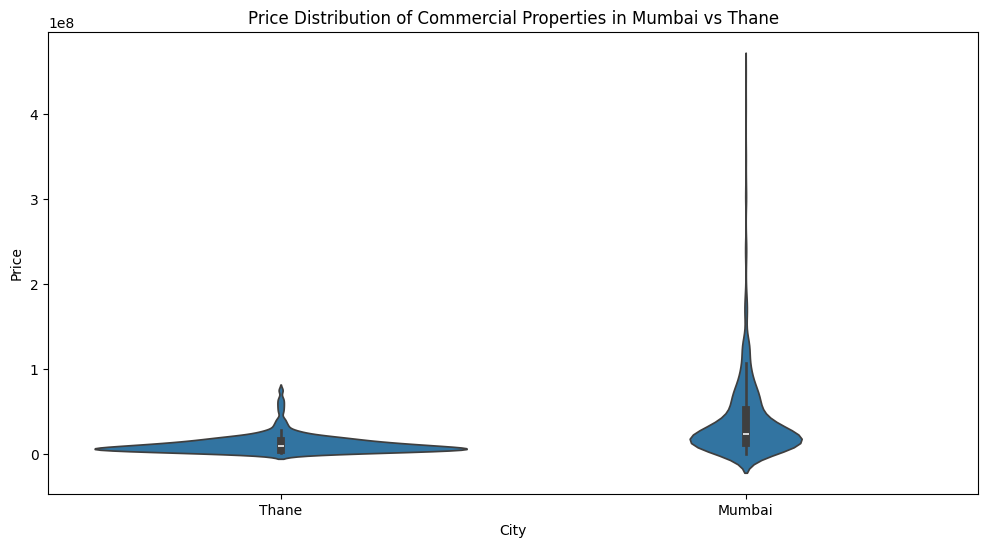

In [32]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='City', y='Price', data=commercial_data)
plt.title('Price Distribution of Commercial Properties in Mumbai vs Thane')
plt.ylabel('Price')
plt.xlabel('City')
plt.show()

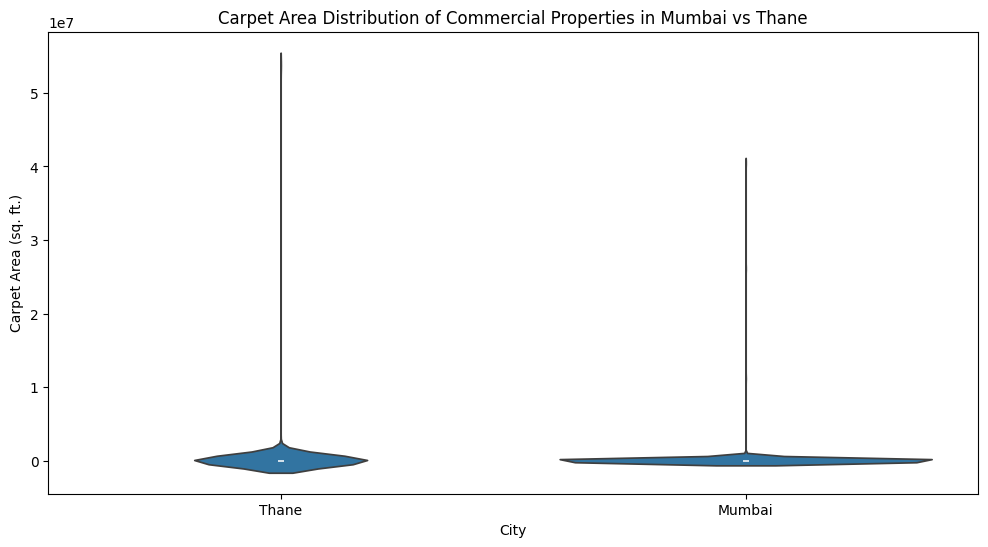

In [33]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='City', y='Carpet Area', data=commercial_data)
plt.title('Carpet Area Distribution of Commercial Properties in Mumbai vs Thane')
plt.ylabel('Carpet Area (sq. ft.)')
plt.xlabel('City')
plt.show()


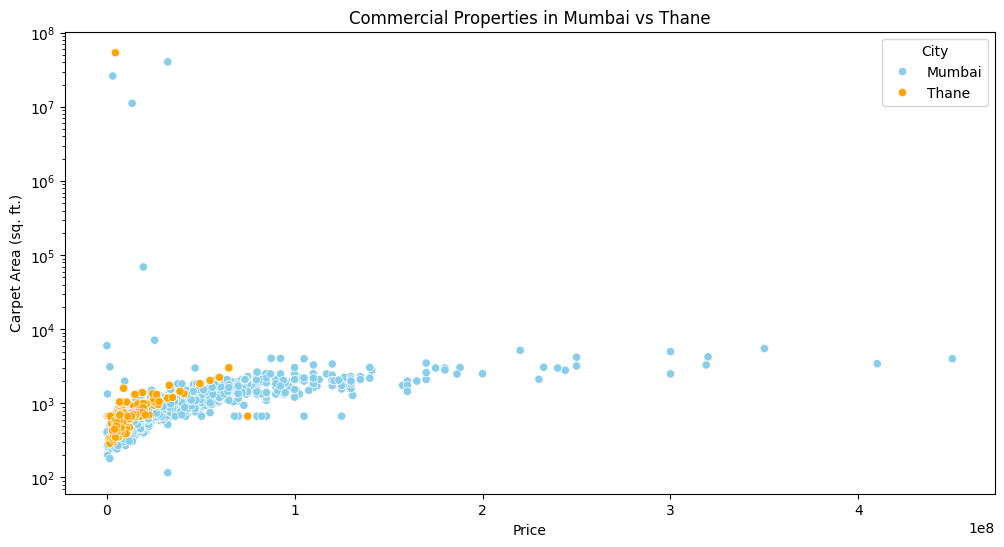

In [34]:

plt.figure(figsize=(12, 6))

# Create a base plot without data
ax = plt.gca()

# Define custom colors for Mumbai and Thane
custom_palette = {'Mumbai': 'skyblue', 'Thane': 'orange'}

# Plot Mumbai first
sns.scatterplot(x='Price', y='Carpet Area', hue='City', palette=custom_palette, data=commercial_data[commercial_data['City'] == 'Mumbai'], ax=ax)

# Plot Thane on top
sns.scatterplot(x='Price', y='Carpet Area', hue='City', palette=custom_palette, data=commercial_data[commercial_data['City'] == 'Thane'], ax=ax)

plt.title('Commercial Properties in Mumbai vs Thane')
plt.ylabel('Carpet Area (sq. ft.)')
plt.xlabel('Price')
plt.yscale('log')

plt.show()

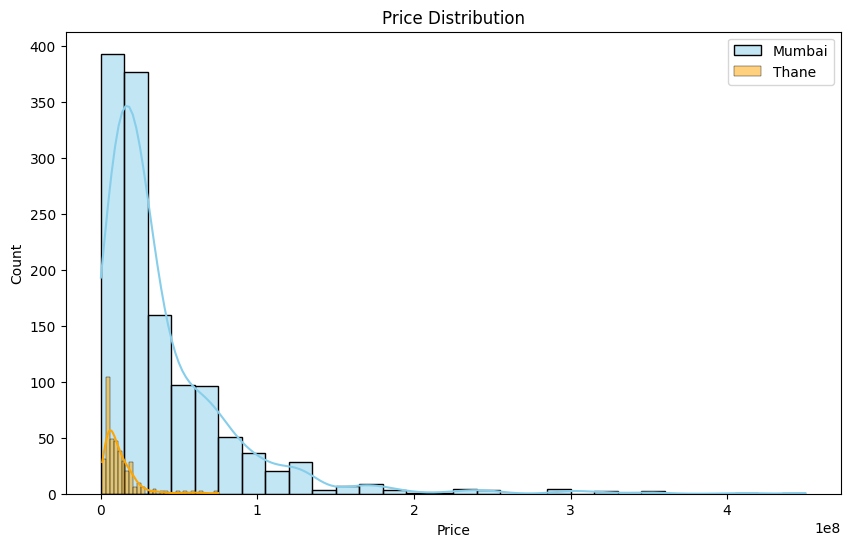

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot histograms for Price
sns.histplot(commercial_data[commercial_data['City'] == 'Mumbai']['Price'], bins=30, color='skyblue', label='Mumbai', kde=True)
sns.histplot(commercial_data[commercial_data['City'] == 'Thane']['Price'], bins=30, color='orange', label='Thane', kde=True)

plt.xlabel('Price')
plt.title('Price Distribution')
plt.legend()

plt.show()


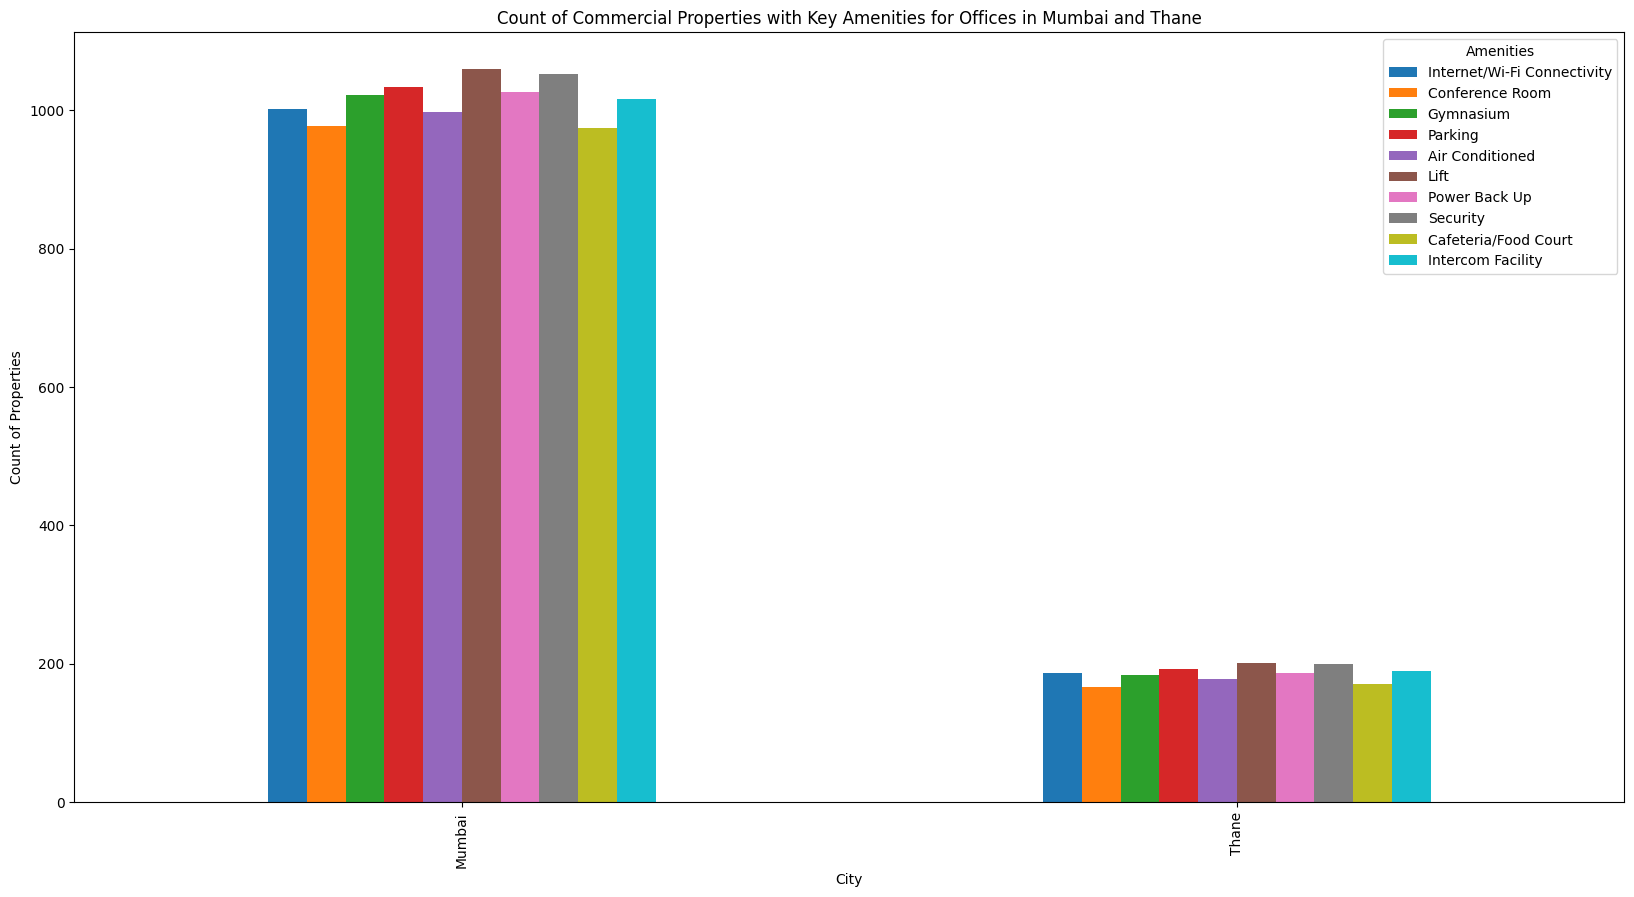

In [36]:
# Calculate the percentage of properties with key amenities for offices in each city
amenities = ['Internet/Wi-Fi Connectivity', 'Conference Room', 'Gymnasium', 'Parking', 'Air Conditioned', 'Lift', 'Power Back Up', 'Security', 'Cafeteria/Food Court', 'Intercom Facility']

amenities_summary = commercial_data.groupby('City')[amenities].sum()
amenities_summary.plot(kind='bar', figsize=(20, 10))
plt.title('Count of Commercial Properties with Key Amenities for Offices in Mumbai and Thane')
plt.ylabel('Count of Properties')
plt.xlabel('City')
plt.legend(title='Amenities')
plt.show()





C:\Users\ARGHYA\AppData\Local\Temp\ipykernel_13260\2753548732.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



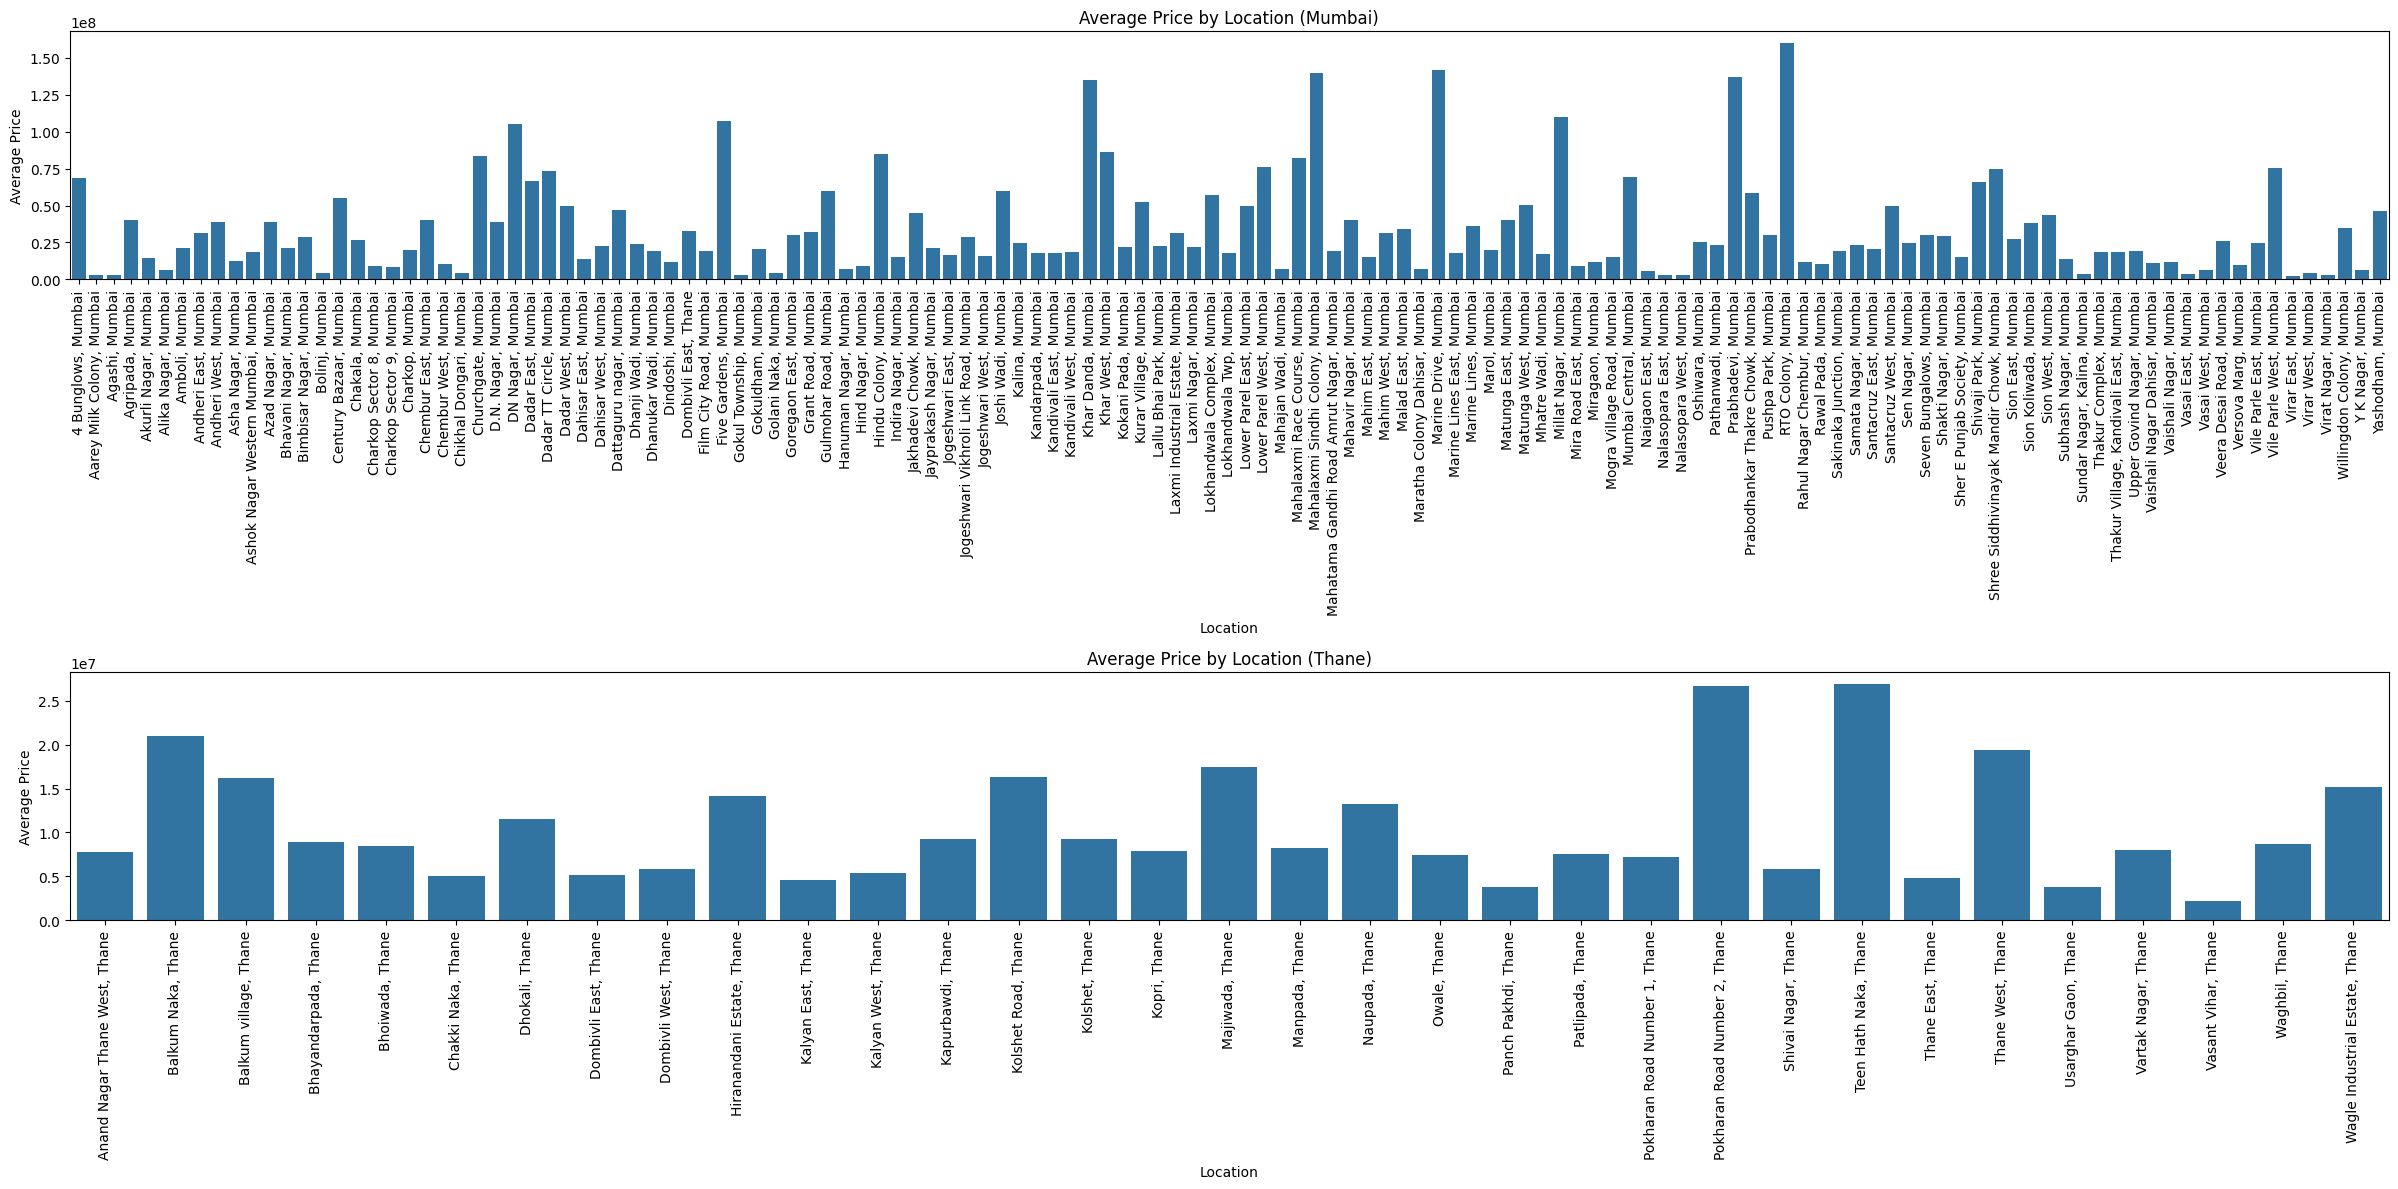

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Location' to string for plotting
commercial_data['Location'] = commercial_data['Location'].astype(str)

# Filter data for Mumbai and Thane
data_mumbai = commercial_data[commercial_data['City'] == 'Mumbai']
data_thane = commercial_data[commercial_data['City'] == 'Thane']

# Calculate average price for each location
avg_price_mumbai = data_mumbai.groupby('Location')['Price'].mean().reset_index()
avg_price_thane = data_thane.groupby('Location')['Price'].mean().reset_index()

# Plotting
plt.figure(figsize=(24, 12))

# Mumbai plot
plt.subplot(2, 1, 1)
sns.barplot(data=avg_price_mumbai, x='Location', y='Price')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.title('Average Price by Location (Mumbai)')
plt.xticks(rotation=90)

# Thane plot
plt.subplot(2, 1, 2)
sns.barplot(data=avg_price_thane, x='Location', y='Price')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.title('Average Price by Location (Thane)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Location' to string for plotting
commercial_data['Location'] = commercial_data['Location'].astype(str)

# Filter data for Mumbai and Thane
data_mumbai = commercial_data[commercial_data['City'] == 'Mumbai']
data_thane = commercial_data[commercial_data['City'] == 'Thane']

# Calculate average price per carpet area for each location
avg_price_mumbai = data_mumbai.groupby('Location')['Price per Carpet Area'].mean().reset_index()
avg_price_thane = data_thane.groupby('Location')['Price per Carpet Area'].mean().reset_index()

# Plotting
plt.figure(figsize=(24, 16))

# Mumbai plot
plt.subplot(2, 1, 1)
sns.barplot(data=avg_price_mumbai, x='Location', y='Price per Carpet Area')
plt.xlabel('Location')
plt.ylabel('Average Price per Carpet Area')
plt.title('Average Price per Carpet Area by Location (Mumbai)')
plt.xticks(rotation=90)

# Thane plot
plt.subplot(2, 1, 2)
sns.barplot(data=avg_price_thane, x='Location', y='Price per Carpet Area')
plt.xlabel('Location')
plt.ylabel('Average Price per Carpet Area')
plt.title('Average Price per Carpet Area by Location (Thane)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


C:\Users\ARGHYA\AppData\Local\Temp\ipykernel_13260\2331348896.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



KeyError: 'Column not found: Price per Carpet Area'

### Task 7

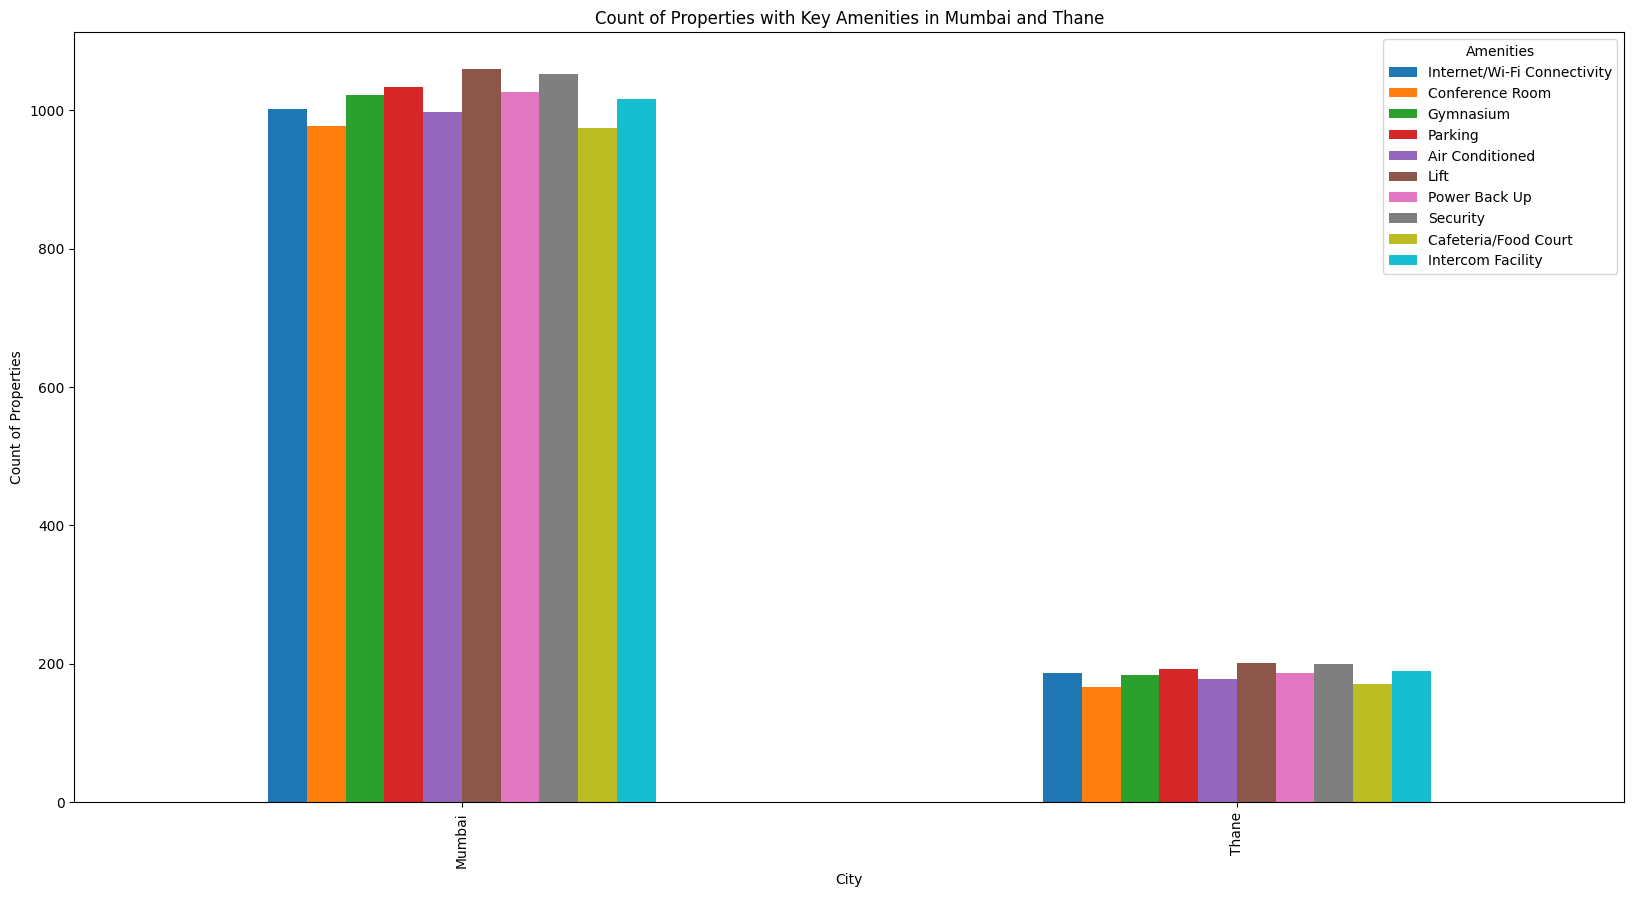

In [ ]:
# Some investors want to analyze the impact of various amenities (e.g., Swimming Pool, Gymnasium,
# Club House) on property prices in Mumbai and Thane. Which amenities seem to add the most value?
# Are there differences in amenity preferences between the two cities?
cities = (df['City'].isin(['Mumbai', 'Thane']))

# Calculate the percentage of properties with key amenities for offices in each city
amenities = ['Swimming Pool','Gymnasium','Club House','Park','Parking','Security','Private Terrace/Garden', 'Air Conditioned','Visitor Parking','Intercom Facility','Maintenance Staff','Internet/Wi-Fi Connectivity','Piped Gas','Jogging and Strolling Track','Smart Home','Kids play area','Library','Puja Room','Study','Servant Room','Store']
colors = [
  '#1f77b4',
  '#ff7f0e',
  '#2ca02c',
  '#d62728',
  '#9467bd',
  '#8c564b',
  '#e377c2',
  '#7f7f7f',
  '#bcbd22',
  '#17becf',
  '#f6c5c1',
  '#c5f6c1',
  '#c1c5f6',
  '#f6f1c1',
  '#f1c5f6',
  '#c1f6f1',
  '#ff33cc',
  '#006600',
  '#6666ff',
  '#f1f6c5',
  '#f5a623'
]



# Plotting with unique colors
amenities_summary.plot(kind='bar', figsize=(20, 10), color=colors)
plt.title('Count of Properties with Key Amenities in Mumbai and Thane')
plt.ylabel('Count of Properties')
plt.xlabel('City')
plt.legend(title='Amenities')
plt.show()



### Task 8


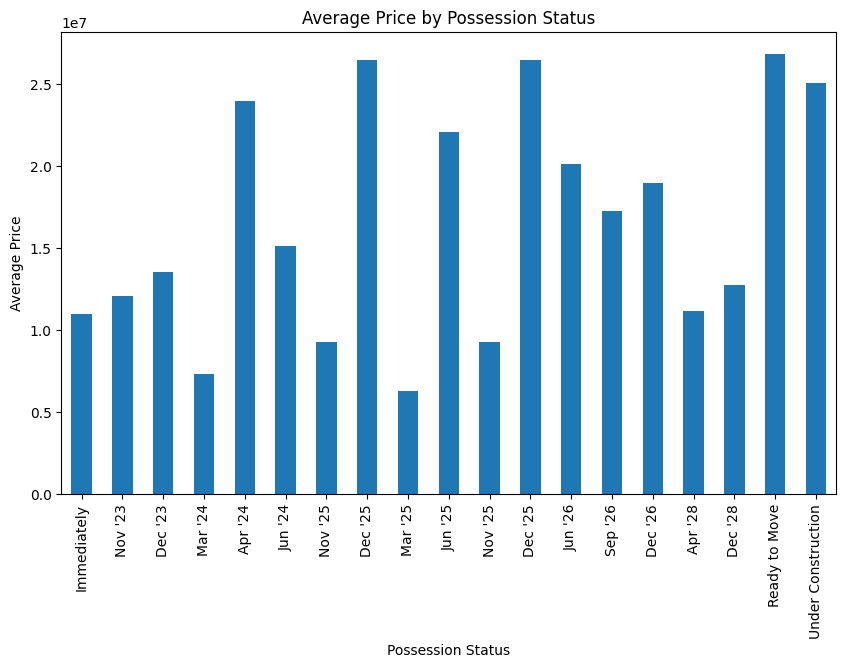

In [ ]:
# compare the average price for each possession status
possession_status = df["Possession Status"].unique()
possession_status = possession_status[possession_status != "Select Date"]
possession_status
possession_status_summary = df.groupby("Possession Status")["Price"].mean()

possession_status_summary = possession_status_summary.reindex(
    [
        "Immediately",
        "Nov '23",
        "Dec '23",
        "Mar '24",
        "Apr '24",
        "Jun '24",
        "Nov '25",
        "Dec '25",
        "Mar '25",
        "Jun '25",
        "Nov '25",
        "Dec '25",
        "Jun '26",
        "Sep '26",
        "Dec '26",
        "Apr '28",
        "Dec '28",
        "Ready to Move",
        "Under Construction",
    ]
)


possession_status_summary.plot(kind="bar", figsize=(10, 6))
plt.title("Average Price by Possession Status")
plt.ylabel("Average Price")
plt.xlabel("Possession Status")
plt.show()

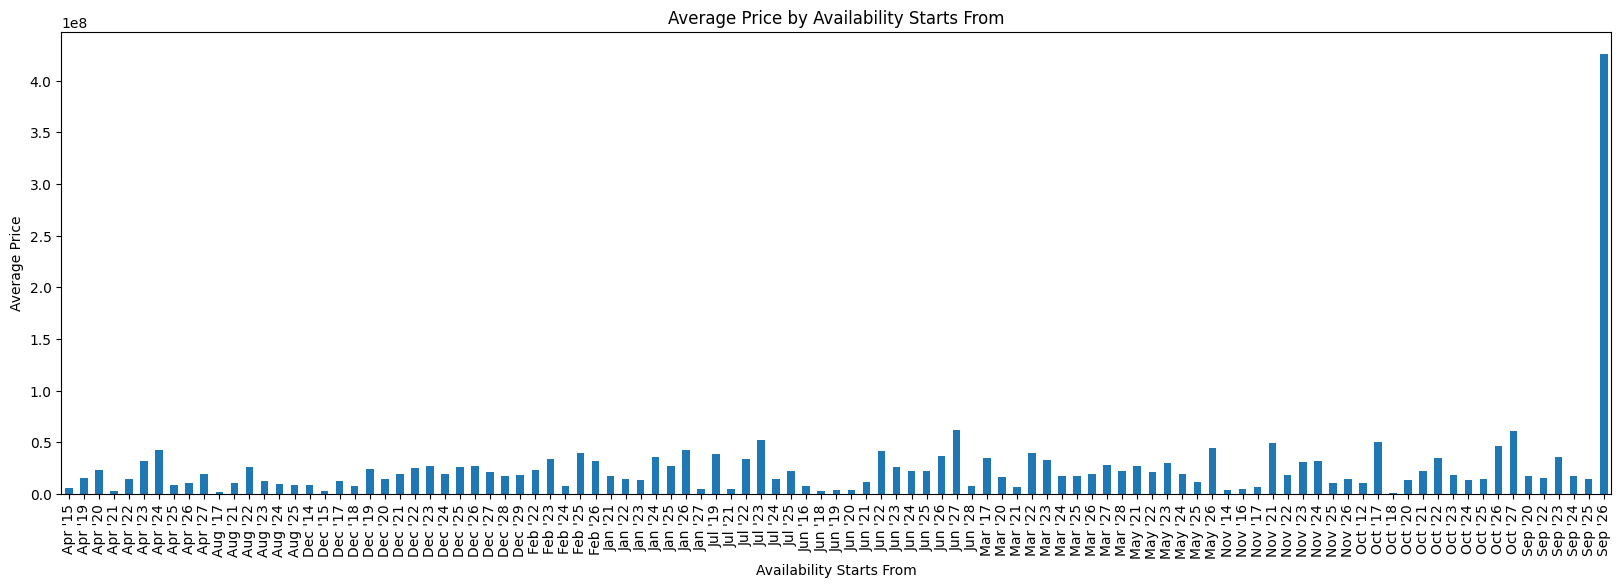

In [52]:

# doing the same but for availability starts from
availability_starts_from = df["Availability Starts From"].unique()
availability_starts_from = availability_starts_from[availability_starts_from != 'Select Date']
availability_starts_from
# plotting a graph for the same
availability_starts_from_summary = df.groupby('Availability Starts From')['Price'].mean()
# plotting a bar graph
availability_starts_from_summary.plot(kind='bar', figsize=(20, 6))
plt.title('Average Price by Availability Starts From')
plt.ylabel('Average Price')
plt.xlabel('Availability Starts From')
plt.show()


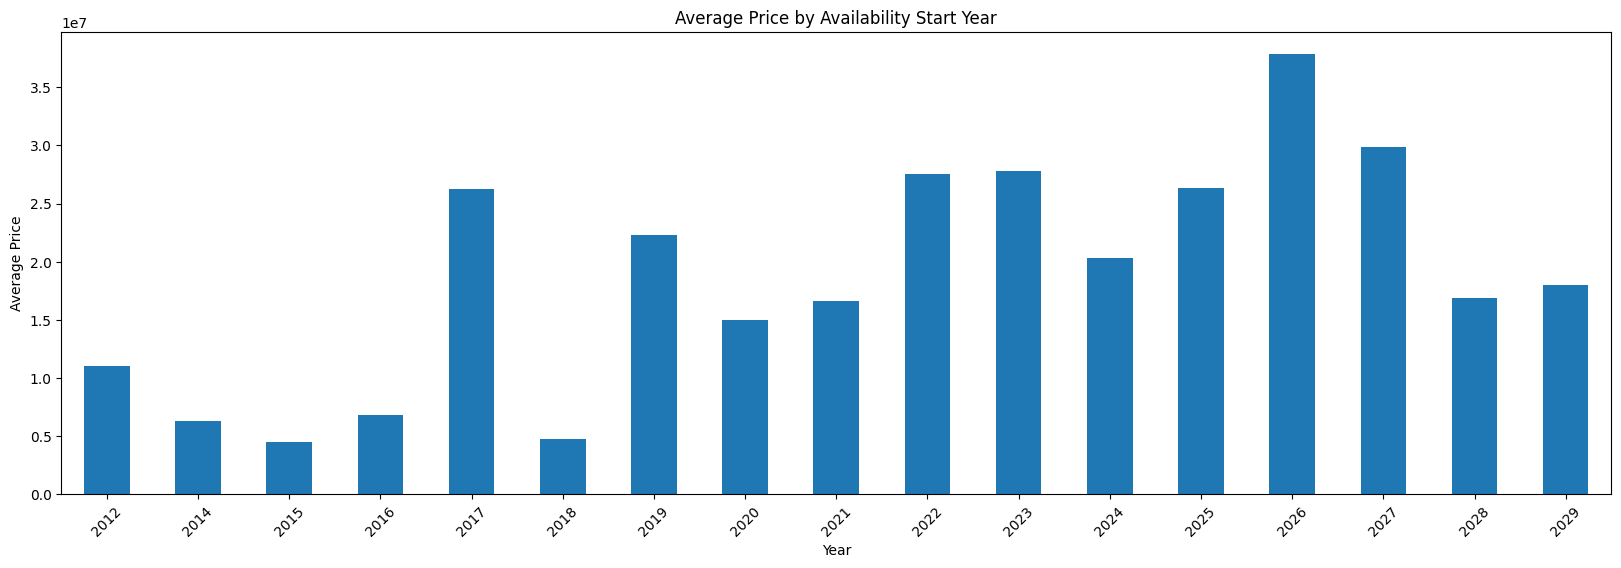

In [53]:

# Extract the two-digit year from the 'Availability Starts From' column
df['Year'] = df['Availability Starts From'].str.extract(r'(\d{2})$')

# Ensure the 'Year' column is treated as a string or numeric as needed
df['Year'] = df['Year'].astype(int) + 2000  # Adjust based on whether you need 20XX or 19XX years

# Group by the extracted year and calculate the average price
availability_starts_from_summary = df.groupby('Year')['Price'].mean()

# Plot the bar graph
availability_starts_from_summary.plot(kind='bar', figsize=(20, 6))
plt.title('Average Price by Availability Start Year')
plt.ylabel('Average Price')
plt.xlabel('Year')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


C:\Users\ARGHYA\AppData\Local\Temp\ipykernel_13260\756888974.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




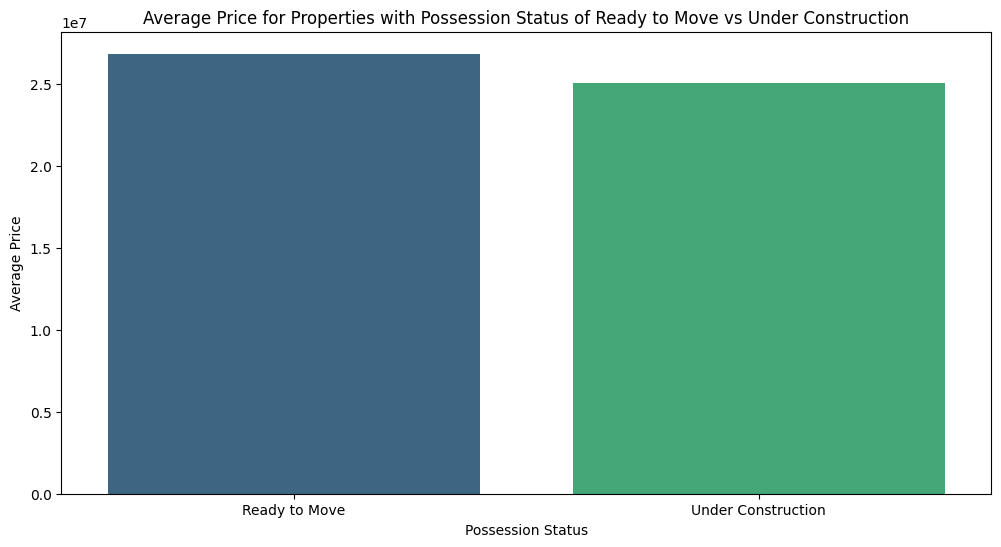

In [54]:
# Calculate average prices for each possession status
avg_price_status = df[df['Possession Status'].isin(['Ready to Move', 'Under Construction'])].groupby('Possession Status')['Price'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_status, x='Possession Status', y='Price', palette='viridis')
plt.title('Average Price for Properties with Possession Status of Ready to Move vs Under Construction')
plt.ylabel('Average Price')
plt.xlabel('Possession Status')
plt.show()


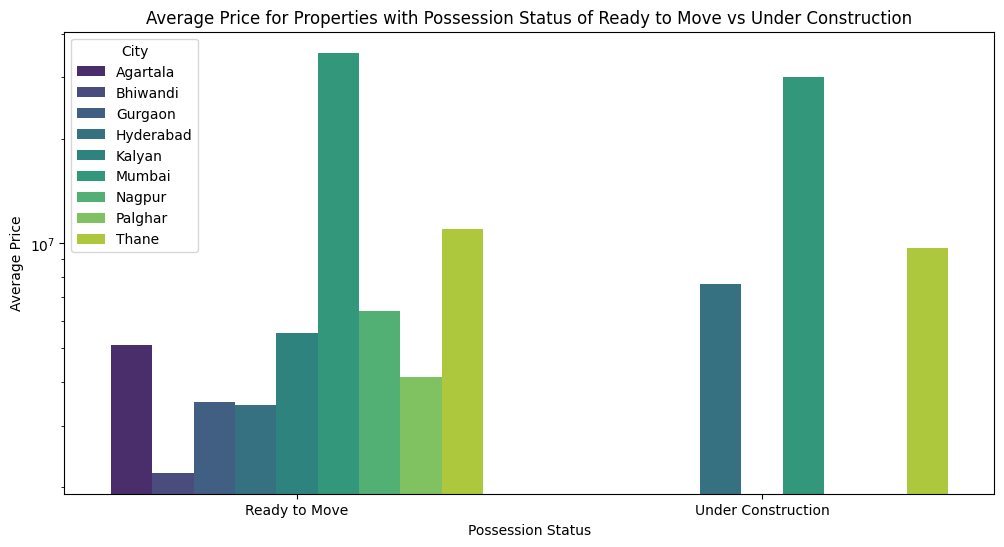

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average prices for each possession status in each city
avg_price_city_status = df[df['Possession Status'].isin(['Ready to Move', 'Under Construction'])].groupby(['City', 'Possession Status'])['Price'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_city_status, x='Possession Status', y='Price', hue='City', palette='viridis')
plt.title('Average Price for Properties with Possession Status of Ready to Move vs Under Construction')
plt.ylabel('Average Price')
plt.xlabel('Possession Status')
plt.yscale('log')
plt.show()


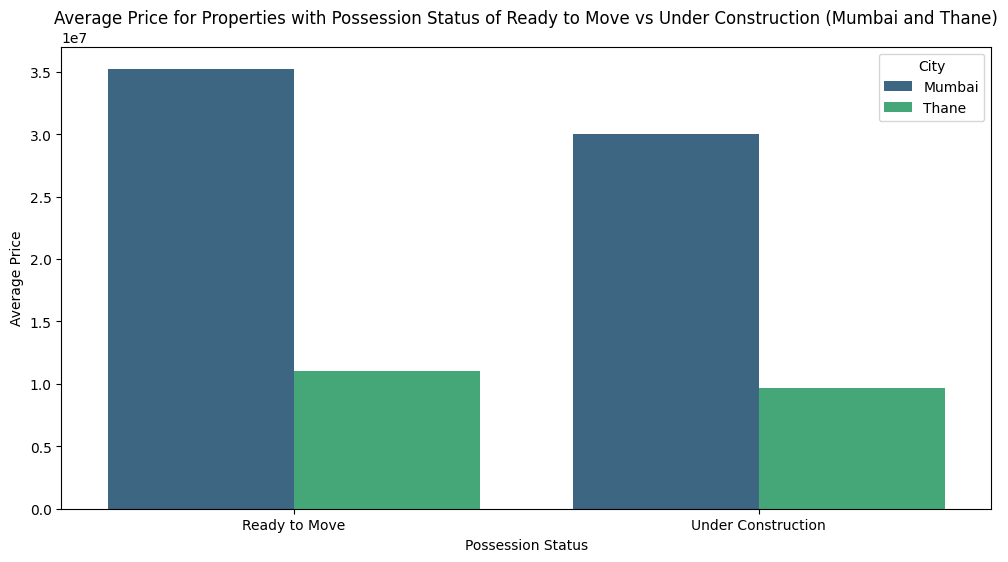

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for Mumbai and Thane
filtered_data = df[df['City'].isin(['Mumbai', 'Thane']) & df['Possession Status'].isin(['Ready to Move', 'Under Construction'])]

# Calculate average prices for each possession status in Mumbai and Thane
avg_price_city_status = filtered_data.groupby(['City', 'Possession Status'])['Price'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_city_status, x='Possession Status', y='Price', hue='City', palette='viridis')
plt.title('Average Price for Properties with Possession Status of Ready to Move vs Under Construction (Mumbai and Thane)')
plt.ylabel('Average Price')
plt.xlabel('Possession Status')
plt.legend(title='City')
plt.show()


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Possession Status', y='Price', data=df[df['Possession Status'].isin(['Ready to Move', 'Under Construction'])])
plt.title('Price Distribution for Properties with Possession Status of Ready to Move vs Under Construction')
plt.ylabel('Price')
plt.xlabel('Possession Status')
plt.show()


KeyboardInterrupt: 

### Task 9
Analyze the impact of developers on property prices and features. Are there certain developers associated with higher-end properties or better amenities? 

In [41]:
# Group by Developer and calculate statistics
developer_stats = df.groupby('Developer').agg({
    'Price': ['mean', 'median', 'std'],
    'Gymnasium': 'mean',
    'Swimming Pool': 'mean',
    'Club House': 'mean'
}).reset_index()

# Flatten multi-level columns
developer_stats.columns = ['Developer', 'Average Price', 'Median Price', 'Price Std Dev', 
                           'Gymnasium %', 'Swimming Pool %', 'Club House %']

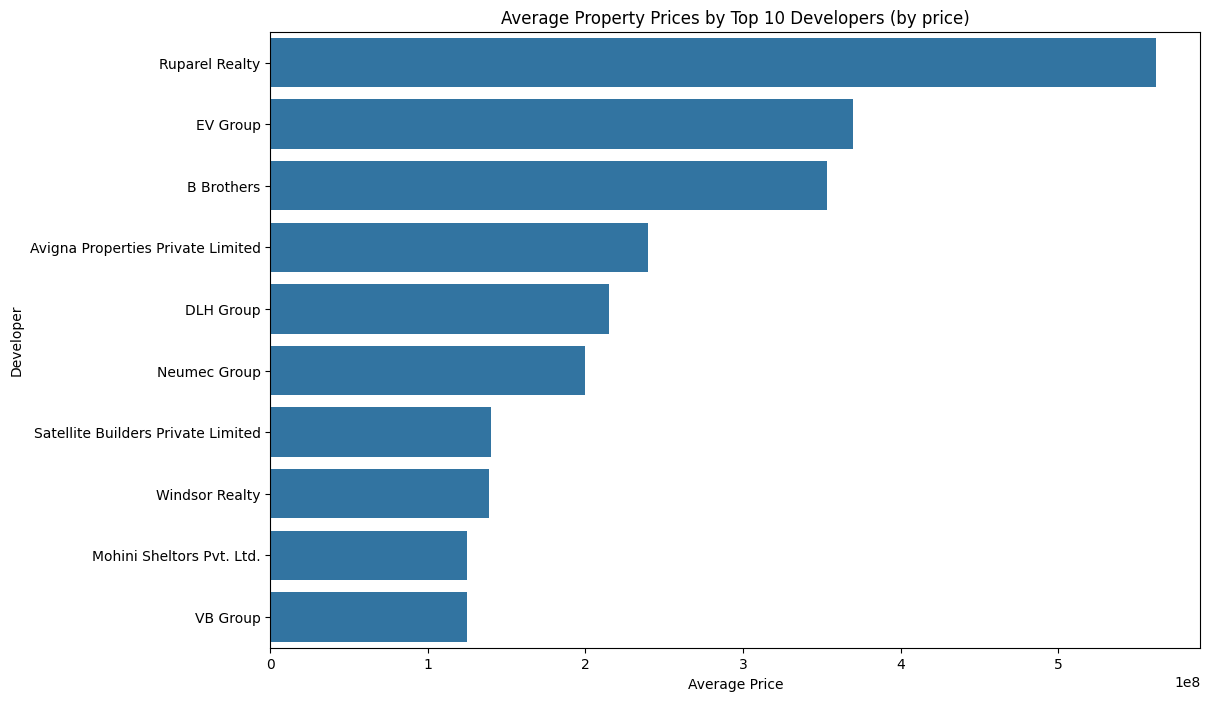

In [42]:
# Sort by Average Price to identify high-end developers
high_end_developers = developer_stats.sort_values('Average Price', ascending=False)
top_10_developers = high_end_developers.head(10)

# Plot the distribution of Average Prices for top 10 developers
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Price', y='Developer', data=top_10_developers)
plt.title('Average Property Prices by Top 10 Developers (by price)')
plt.xlabel('Average Price')
plt.ylabel('Developer')
plt.show()



<Figure size 1200x800 with 0 Axes>

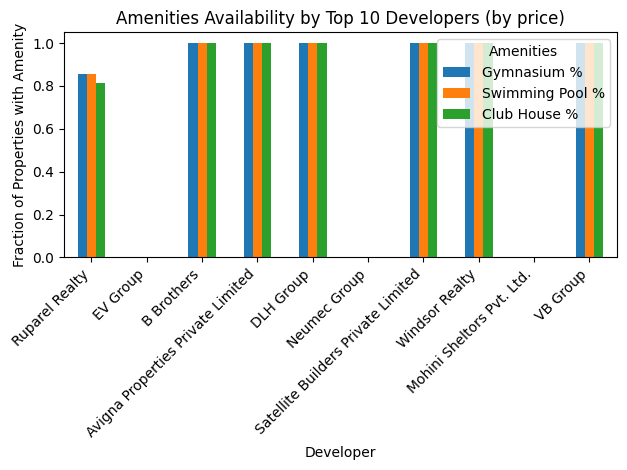

In [43]:
plt.figure(figsize=(12, 8))
top_10_developers.plot(x='Developer', y=['Gymnasium %', 'Swimming Pool %', 'Club House %'], kind='bar')
plt.title('Amenities Availability by Top 10 Developers (by price)')
plt.xlabel('Developer')
plt.ylabel('Fraction of Properties with Amenity')
plt.legend(title='Amenities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [44]:
# Group by Developer and count the number of properties
developer_counts = df.groupby('Developer').size().reset_index(name='Property Count')

# Merge with the previous statistics
developer_stats = developer_stats.merge(developer_counts, on='Developer')

# Sort by Property Count to identify top developers
top_developers_by_properties = developer_stats.sort_values('Property Count', ascending=False)
top_10_developers_by_properties = top_developers_by_properties.head(10)


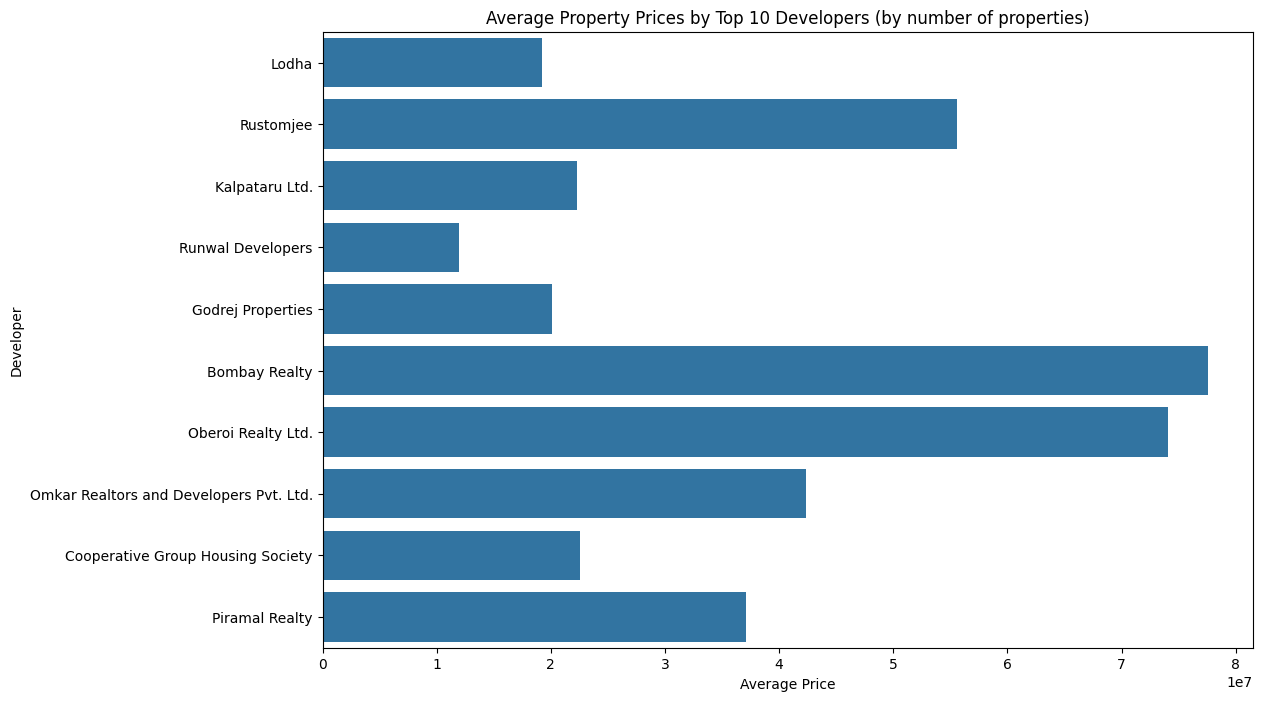

In [45]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Price', y='Developer', data=top_10_developers_by_properties)
plt.title('Average Property Prices by Top 10 Developers (by number of properties)')
plt.xlabel('Average Price')
plt.ylabel('Developer')
plt.show()


<Figure size 1200x800 with 0 Axes>

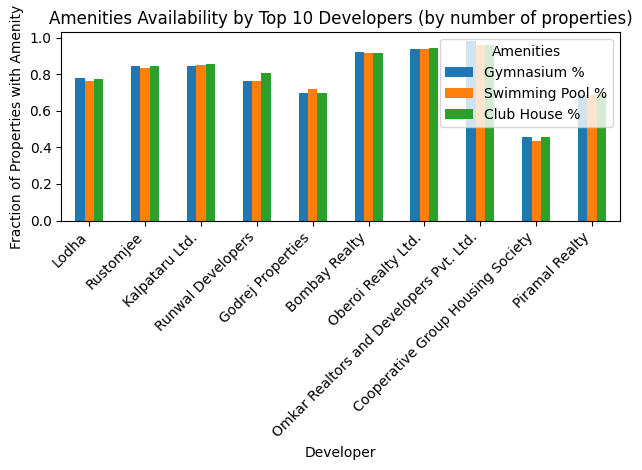

In [46]:
plt.figure(figsize=(12, 8))
top_10_developers_by_properties.plot(x='Developer', y=['Gymnasium %', 'Swimming Pool %', 'Club House %'], kind='bar')
plt.title('Amenities Availability by Top 10 Developers (by number of properties)')
plt.xlabel('Developer')
plt.ylabel('Fraction of Properties with Amenity')
plt.legend(title='Amenities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\ARGHYA\AppData\Local\Temp\ipykernel_21928\605039876.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



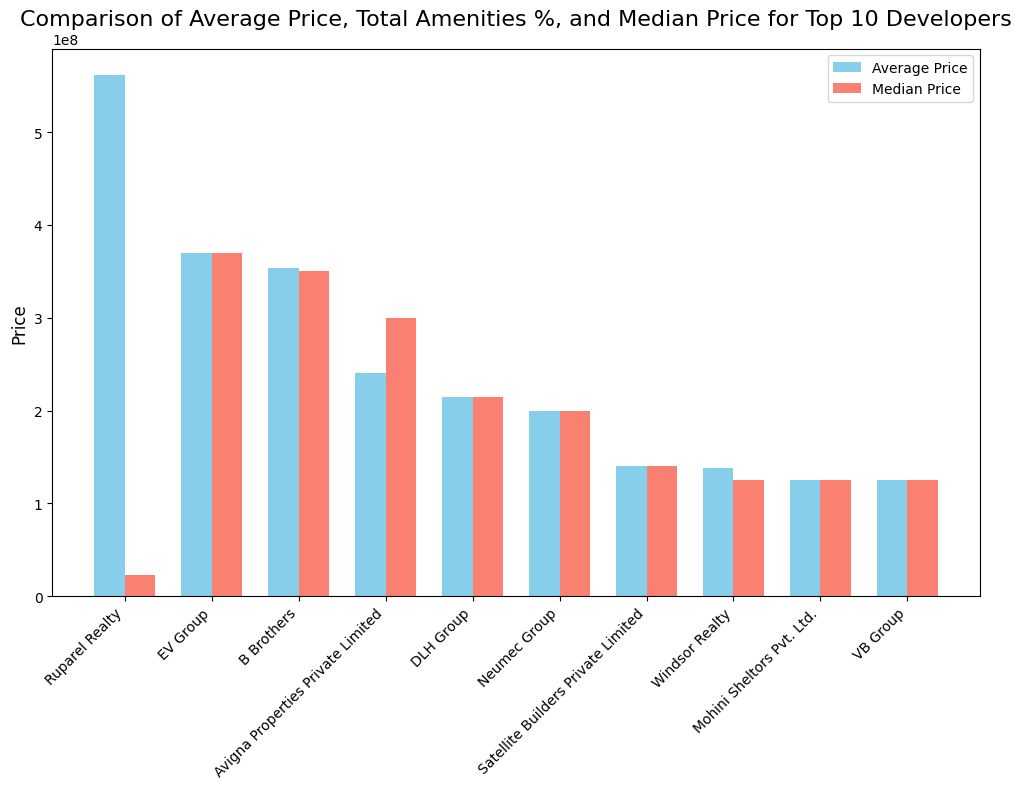

In [47]:
# Calculate Total Amenities %
top_10_developers['Total Amenities %'] = top_10_developers['Gymnasium %'] + top_10_developers['Swimming Pool %'] + top_10_developers['Club House %']

# Sort developers by Average Price
top_10_developers_sorted = top_10_developers.sort_values('Average Price', ascending=False)

# Create the grouped bar chart
fig, ax1 = plt.subplots(figsize=(10, 8))

# Set the width of each bar group
width = 0.35

# Set up the x-axis
x = np.arange(len(top_10_developers_sorted))

# Plot Average Price bars
rects1 = ax1.bar(x - width/2, top_10_developers_sorted['Average Price'], width, label='Average Price', color='skyblue')

# Plot Total Amenities % bars
# rects2 = ax1.bar(x, top_10_developers_sorted['Total Amenities %'], width, label='Total Amenities %', color='lightgreen')

# Plot Median Price bars
rects3 = ax1.bar(x + width/2, top_10_developers_sorted['Median Price'], width, label='Median Price', color='salmon')

# Customize the plot
ax1.set_ylabel('Price', fontsize=12)
# making the yscale log

ax1.set_title('Comparison of Average Price, Total Amenities %, and Median Price for Top 10 Developers', fontsize=16)
ax1.set_xticks(x)
# taking log on the y axis
# ax1.set_yscale('log')
ax1.set_xticklabels(top_10_developers_sorted['Developer'], rotation=45, ha='right')
ax1.legend()

# Add value labels on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax1.annotate(f'{height:.0f}',
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', rotation=90)

# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

C:\Users\ARGHYA\AppData\Local\Temp\ipykernel_21928\1477277228.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ARGHYA\AppData\Local\Temp\ipykernel_21928\1477277228.py:24: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



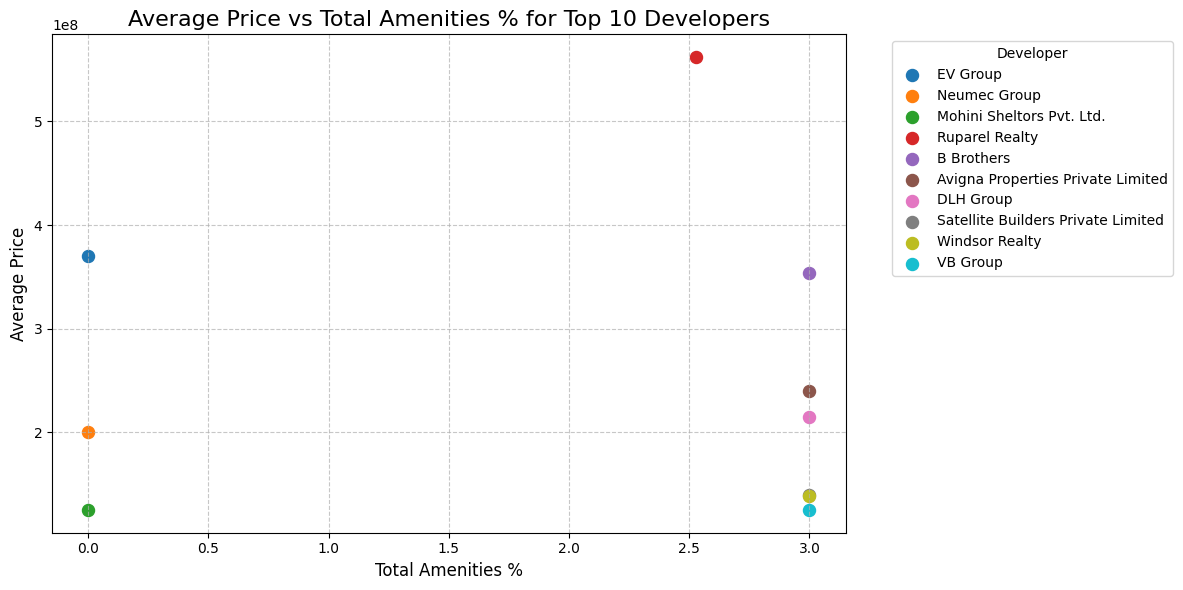

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Calculate Total Amenities %
top_10_developers['Total Amenities %'] = (
    top_10_developers['Gymnasium %'] + 
    top_10_developers['Swimming Pool %'] + 
    top_10_developers['Club House %']
)

# Sort developers by Total Amenities %
top_10_developers_sorted = top_10_developers.sort_values('Total Amenities %')

# Create the scatter plot
plt.figure(figsize=(12, 6))

# Convert pandas Series to numpy arrays
x = top_10_developers_sorted['Total Amenities %'].to_numpy()
y = top_10_developers_sorted['Average Price'].to_numpy()

# Create a color map
num_developers = len(top_10_developers_sorted)
cmap = cm.get_cmap('tab10', num_developers)

# Create scatter plot with distinct colors and labels in legend
for i, (index, row) in enumerate(top_10_developers_sorted.iterrows()):
    plt.scatter(row['Total Amenities %'], row['Average Price'], s=75, color=cmap(i / num_developers), label=row['Developer'])

plt.title('Average Price vs Total Amenities % for Top 10 Developers', fontsize=16)
plt.xlabel('Total Amenities %', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

# Add legend to the plot
plt.legend(title='Developer', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


---